# **Customer segmentation to define marketing strategy**

### **Contents**

1. [Gathering Data](#Gathering-Data)
2. [Data preprocessing](#Data-preprocessing)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Principal Component Analysis (PCA)](Principal-Component-Analysis-(PCA))
5. [Clustering](#Clustering)
6. [Model comparison](#Model-comparison)
7. [Cluster Analysis](#Cluster-Analysis)
8. [Conclusion](#conclusion)

****

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| cust_id | Object | Identification of Credit Card holder (Categorical) |
| balance | Float | balance amount left in their account to make purchases |
| balance_frequency | Float | How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| purchases | Float | Amount of purchases made from account (oneoff_PURCHASE+installments_purchases) |
| oneoff_purchases | Float | Maximum purchase amount done in one-go |
| installments_purchases | Float | Amount of purchase done in installment |
| cash_advance | Float | Cash in advance given by the user |
| purchases_frequency | Float | How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| oneoff_purchases_frequency | Float | How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| purchases_installments_frequency | Float | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| cash_advance_frequency | Float | How frequently the cash in advance being paid |
| cash_advance_trx | Integer | Number of Transactions made with "Cash in Advanced" |
| purchases_trx | Integer | Number of purchase transactions made |
| credit_limit | Float | Limit of Credit Card for user |
| payments | Float | Amount of payment done by user |
| minimum_payments | Float | minimum amount of payments made by user |
| prc_full_payment | Float | Percent of full payment paid by user |
| tenure | Integer | tenure of credit card service for user in years |

<font color='blue'> **Let's import all requir libraries** <font>
****

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')

np.random.seed(42)
print('Libraries have been imported')

Libraries have been imported


In [ ]:
#from google.colab import files 
#files.upload()

# Step-1: Gathering Data
****

<font color='blue'> **Let's read the dataset** <font>

In [2]:
data=pd.read_csv('Data\CC GENERAL.csv')
df=data.copy()
df.head(2)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182       95.4               0.0   
1  C10002  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12

In [6]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(df.shape))
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Shape of data: (8950, 18)
Number of rows: 8950
Number of columns: 18


# Step-2: Data preprocessing
****

<font color='blue'> **Let's check the null values** <font>

In [7]:
# Checking the number of  null values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

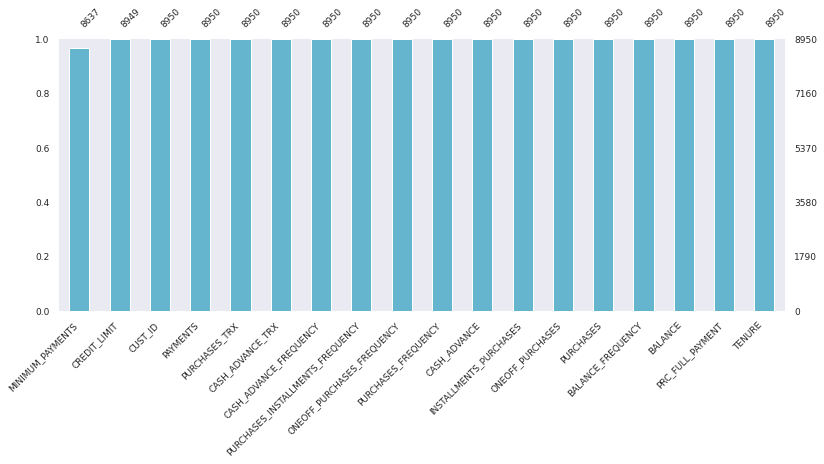

In [8]:
import missingno as miss
# plot to visualize the missing value proportion
sns.set(style='dark')
miss.bar(df,color="c", sort="ascending", figsize=(13,5), fontsize=9)

<font color='blue'>**Let's count the number of distinct elements**<font>

In [9]:
# Counting the number of distinct elements.
df.nunique().sort_values(ascending=False)

CUST_ID                             8950
BALANCE                             8871
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PURCHASES                           6203
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
ONEOFF_PURCHASES                    4014
CREDIT_LIMIT                         205
PURCHASES_TRX                        173
CASH_ADVANCE_TRX                      65
CASH_ADVANCE_FREQUENCY                54
PRC_FULL_PAYMENT                      47
PURCHASES_INSTALLMENTS_FREQUENCY      47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_FREQUENCY                   47
BALANCE_FREQUENCY                     43
TENURE                                 7
dtype: int64

<font color='blue'>**Let's print information about the dataset**<font>

In [10]:
# printing information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<font color='blue'>**Let's remove duplicate rows**<font>

In [11]:
# Removing duplicate rows from the DataFrame.
df.drop_duplicates(inplace=True)

  <font color='blue'>**Let's drop unnecessary columns**<font> 

In [3]:
# Unnecessary columns are omitted.
df.drop(columns=['CUST_ID'], inplace=True)

  <font color='blue'>**Let's impute missing value**<font>  

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
# The KNNImputer class instance is fitted and all missing values are imputed.
Imputed_np = imputer.fit_transform(df)

# numpy.ndarray is moved back to dataFrame
Imputed_df = pd.DataFrame(Imputed_np, columns=df.columns, dtype=np.float32)
Imputed_df.sample(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7669   16.834929           0.454545   15.00000         15.000000   
6125  540.020874           1.000000  612.22998        495.609985   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7669                0.000000    209.025391             0.090909   
6125              116.620003   1708.923218             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7669                    0.090909                               0.0   
6125                    0.166667                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7669                0.090909               1.0            1.0        7500.0   
6125                0.333333              10.0           10.0        2000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
7669   430.213013         86.959785               0.0    11.0  
6125  1642.068726        419.956238               0.0    12.0

In [14]:
# Checking the number of  null values
Imputed_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Step-3: Exploratory Data Analysis (EDA)
****

<font color='blue'>**Let's generate descriptive statistics**<font>  

In [15]:
# Generated descriptive statistics.
Imputed_df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474854  2081.531982   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204895  2136.634766   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437439  1659.887817   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067657   904.338135   0.000000   
CASH_ADVANCE                      8950.0   978.871155  2097.163818   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824646   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.179688  3638.701904  50.000000   
PAYMENTS                          8950.0  1733.143799  2895.063721   0.000000   
MINIMUM_PAYMENTS                  8950.0   852.716187  2347.655029   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517319     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281921   873.385254  2054.140015   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635001   361.279999  1110.130035   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405014   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637497   
CASH_ADVANCE                         0.000000     0.000000  1113.821136   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276154   856.901520  1901.134308   
MINIMUM_PAYMENTS                   166.310863   300.956131   804.414764   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                           max  
BALANCE                           19043.138672  
BALANCE_FREQUENCY                     1.000000  
PURCHASES                         49039.570312  
ONEOFF_PURCHASES                  40761.250000  
INSTALLMENTS_PURCHASES            22500.000000  
CASH_ADVANCE                      47137.210938  
PURCHASES_FREQUENCY                   1.000000  
ONEOFF_PURCHASES_FREQUENCY            1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000  
CASH_ADVANCE_FREQUENCY                1.500000  
CASH_ADVANCE_TRX                    123.000000  
PURCHASES_TRX                       358.000000  
CREDIT_LIMIT                      30000.000000  
PAYMENTS                          50721.484375  
MINIMUM_PAYMENTS                  76406.210938  
PRC_FULL_PAYMENT                      1.000000  
TENURE                               12.000000

<font color='blue'>**Let's detect the anomaly**<font>  

    | Anomaly: 1

In [5]:
Imputed_df[Imputed_df['CASH_ADVANCE_FREQUENCY'] > 1]

BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
681   5656.069824           1.000000  362.359985        362.359985   
1626  2876.009277           1.000000  152.610001        152.610001   
2555  5906.185059           1.000000  141.800003        141.800003   
2608  7801.511719           1.000000  231.399994        231.399994   
3038  3846.742432           1.000000    0.000000          0.000000   
3253  5709.486328           0.833333    0.000000          0.000000   
8055  1917.895752           1.000000  285.070007        285.070007   
8365  3857.562256           1.000000    0.000000          0.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
681                      0.0   7240.433105             0.250000   
1626                     0.0   3719.650146             0.333333   
2555                     0.0   1651.286865             0.125000   
2608                     0.0   4109.465332             0.100000   
3038                     0.0   1932.460693             0.000000   
3253                     0.0   2794.326416             0.000000   
8055                     0.0   6084.858887             0.363636   
8365                     0.0   2127.213867             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
681                 1.250000              12.0            2.0        8000.0   
1626                1.166667              24.0            2.0        4000.0   
2555                1.125000              12.0            2.0       10000.0   
2608                1.100000              20.0            3.0       13500.0   
3038                1.500000              18.0            0.0        5600.0   
3253                1.166667              10.0            0.0        6000.0   
8055                1.090909              28.0            6.0        3000.0   
8365                1.142857              26.0            0.0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421509       2036.877563               0.0     8.0  
1626   248.342972        584.926331               0.0     6.0  
2555   933.969971        919.289673               0.0     8.0  
2608  1593.617798       1522.496704               0.0    10.0  
3038   496.245850        538.346863               0.0     6.0  
3253   550.513306       1299.463379               0.0     6.0  
8055  5692.683105        556.449646               0.0    11.0  
8365   617.508972        538.396851               0.0     7.0

Since, some quantity of cash advance frequency is higher than 1. So, we have decided to change the quantity to 1,

In [6]:
higher_cash_advance_freq = Imputed_df[Imputed_df['CASH_ADVANCE_FREQUENCY'] > 1].index

# Changed the cash advance frequency from higher than 1 to 1
Imputed_df['CASH_ADVANCE_FREQUENCY'].iloc[higher_cash_advance_freq] = 1

# Checking whether there is still cash advance frequency higher than 1
Imputed_df[Imputed_df['CASH_ADVANCE_FREQUENCY'] > 1].CASH_ADVANCE_FREQUENCY.any()

False

    | Anomaly: 2

In [18]:
Anomaly_2=Imputed_df[Imputed_df['BALANCE'] > Imputed_df['CREDIT_LIMIT']]
print('There are {} balances above the credit limit \n'.format(Anomaly_2.shape[0]))
Anomaly_2.sample(5)

There are 227 balances above the credit limit 



BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
10    1293.125000                1.0  920.119995               0.0   
2471  1054.906006                1.0  885.440002               0.0   
6080  1540.337646                1.0  551.619995             360.0   
281   1129.337524                1.0  498.959991               0.0   
562   1029.101074                1.0   49.099998               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
10                920.119995      0.000000             1.000000   
2471              885.440002      0.000000             0.833333   
6080              191.619995      0.000000             0.833333   
281               498.959991     72.259354             1.000000   
562                49.099998      0.000000             0.250000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
10                      0.000000                          1.000000   
2471                    0.000000                          0.833333   
6080                    0.333333                          0.750000   
281                     0.000000                          1.000000   
562                     0.000000                          0.250000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
10                  0.000000               0.0           12.0        1200.0   
2471                0.000000               0.0          111.0        1000.0   
6080                0.000000               0.0           16.0        1500.0   
281                 0.083333               1.0           12.0        1000.0   
562                 0.000000               0.0            3.0        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
10    1083.301025       2172.697754               0.0    12.0  
2471  1057.254150       1613.401245               0.0    12.0  
6080   655.465576       1226.591553               0.0    12.0  
281    829.505493       1623.389404               0.0    12.0  
562     59.924534       8269.956055               0.0    12.0

    | Anomaly: 3

In [19]:
Anomaly_3=Imputed_df[Imputed_df['PURCHASES'] > Imputed_df['CREDIT_LIMIT']]
print('There are {} purchases above the credit limit \n'.format(Anomaly_3.shape[0]))
Anomaly_3.sample(5)

There are 441 purchases above the credit limit 



BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
1490  1177.125244                1.0  8190.899902       6949.660156   
299    191.450714                1.0  1641.069946       1641.069946   
3688  1210.573730                1.0  2077.090088       1578.619995   
3830   726.779785                1.0  5497.040039       5497.040039   
5858   645.515381                1.0   756.000000        756.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1490             1241.239990      0.000000             1.000000   
299                 0.000000    380.972351             0.666667   
3688              498.470001      0.000000             1.000000   
3830                0.000000      0.000000             0.583333   
5858                0.000000      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1490                    0.916667                               0.5   
299                     0.666667                               0.0   
3688                    1.000000                               0.5   
3830                    0.583333                               0.0   
5858                    1.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1490                0.000000               0.0           56.0        5000.0   
299                 0.083333               1.0           15.0         500.0   
3688                0.000000               0.0           20.0        1500.0   
3830                0.000000               0.0           33.0        1700.0   
5858                0.000000               0.0           12.0         600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1490  7007.797363        354.703339          0.416667    12.0  
299   1583.918823        137.046295          0.636364    12.0  
3688   879.902527        525.459473          0.000000    10.0  
3830  4207.962402        193.423935          0.250000    12.0  
5858  1305.933105        883.267029          0.000000    12.0

    | Anomaly: 4

In [20]:
Anomaly_4=Imputed_df[Imputed_df['CASH_ADVANCE'] > Imputed_df['CREDIT_LIMIT']]
print('There are {} cash advance above the credit limit \n'.format(Anomaly_4.shape[0]))
Anomaly_4.sample(5)

There are 411 cash advance above the credit limit 



BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
7861   589.810913           1.000000    0.000000          0.000000   
8265  1209.031616           1.000000  103.910004        103.910004   
182   2881.253662           1.000000  117.000000          0.000000   
8180   763.228088           0.900000    0.000000          0.000000   
4098   295.374207           0.909091    0.000000          0.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7861                     0.0   4397.346191             0.000000   
8265                     0.0   5910.814453             0.083333   
182                    117.0  17661.494141             0.250000   
8180                     0.0   1948.071899             0.000000   
4098                     0.0   2032.983398             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7861                    0.000000                          0.000000   
8265                    0.083333                          0.000000   
182                     0.000000                          0.166667   
8180                    0.000000                          0.000000   
4098                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7861                0.416667              13.0            0.0        2000.0   
8265                0.416667               8.0            1.0        2500.0   
182                 0.750000              28.0            3.0        4500.0   
8180                0.500000              48.0            0.0        1200.0   
4098                0.250000               4.0            0.0        1200.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
7861   2705.910889        794.238953          0.200000    12.0  
8265   5904.060059        397.704010          0.083333    12.0  
182   17301.832031        931.618469          0.166667    12.0  
8180   1223.745239        263.756378          0.125000    10.0  
4098   2781.869873        174.631958          0.000000    12.0

    | Anomaly: 5

In [21]:
Anomaly_5=Imputed_df[Imputed_df['MINIMUM_PAYMENTS'] > Imputed_df['PAYMENTS']]
print('There are {} minimum payments above the payment \n'.format(Anomaly_5.shape[0]))
Anomaly_5.sample(5)

There are 2612 minimum payments above the payment 



BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
5735  1761.692993                1.0     0.000000          0.000000   
4114  2778.737061                1.0  1973.000000       1973.000000   
4872     0.000000                0.0    94.500000          0.000000   
5273  1500.810669                1.0  2340.870117       1975.550049   
4834    15.307062                1.0    71.519997          0.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5735                0.000000    950.448914             0.000000   
4114                0.000000      0.000000             0.166667   
4872               94.500000      0.000000             0.166667   
5273              365.320007      0.000000             0.916667   
4834               71.519997      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5735                    0.000000                          0.000000   
4114                    0.166667                          0.000000   
4872                    0.000000                          0.166667   
5273                    0.833333                          0.500000   
4834                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5735                    0.25               7.0            0.0        2000.0   
4114                    0.00               0.0            2.0        6500.0   
4872                    0.00               0.0            2.0        1500.0   
5273                    0.00               0.0           31.0        5500.0   
4834                    0.00               0.0            6.0        1500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5735  414.860382        452.085175              0.00    12.0  
4114  630.766663        728.216736              0.00    12.0  
4872    0.000000         79.815613              0.00    12.0  
5273  348.740814        431.266388              0.00    12.0  
4834   55.180489         69.302498              0.25     6.0

In [22]:
Imputed_df.shape

(8950, 17)

<font color='blue'>**Let's detect outlier**<font>

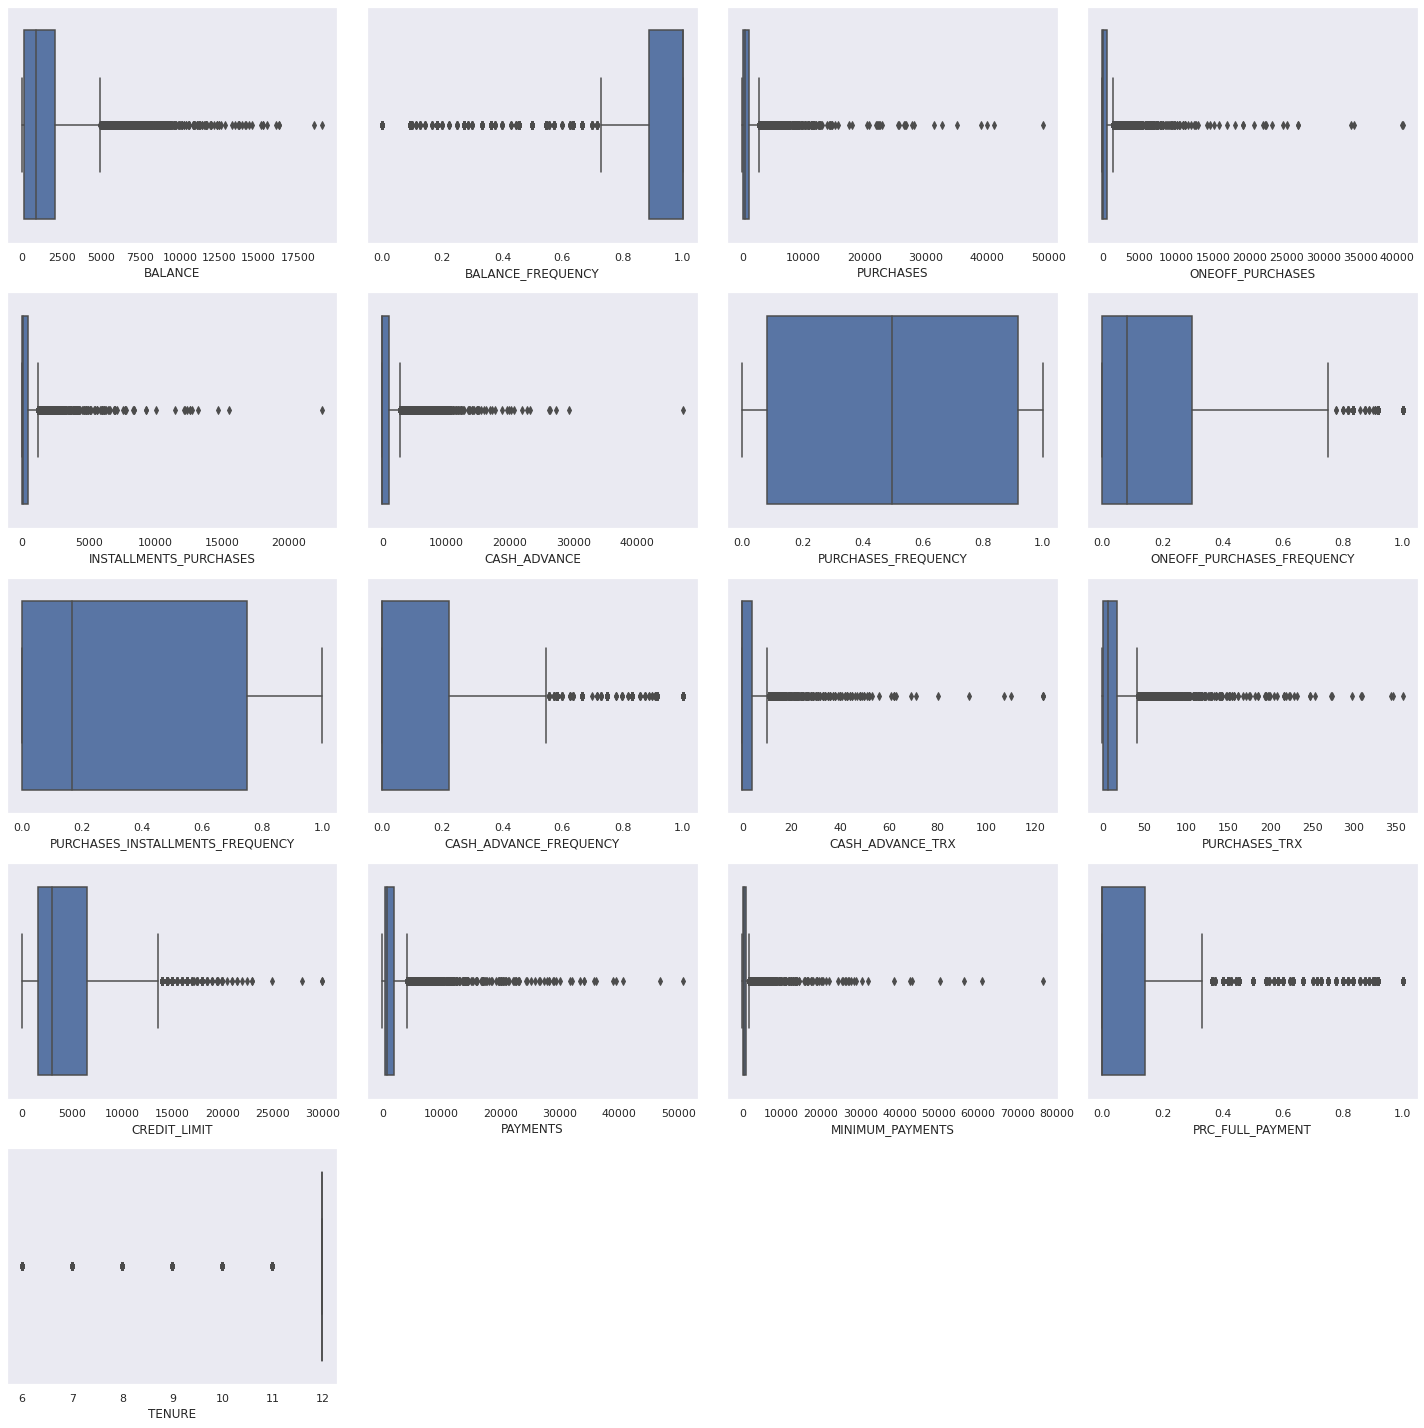

In [23]:
plt.figure(figsize=(20,20))
sns.set(style='dark')
for i in range(len(Imputed_df.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(Imputed_df[Imputed_df.columns[i]])
    
plt.tight_layout()

There is a vast amount of data outdoors. We may thus presume that outliers are fundamentally the dataset's nature. We choose not to eliminate the outliers.

### **Univariate Analysis**

<font color='blue'>**Let's plot histogram of all columns**<font>  

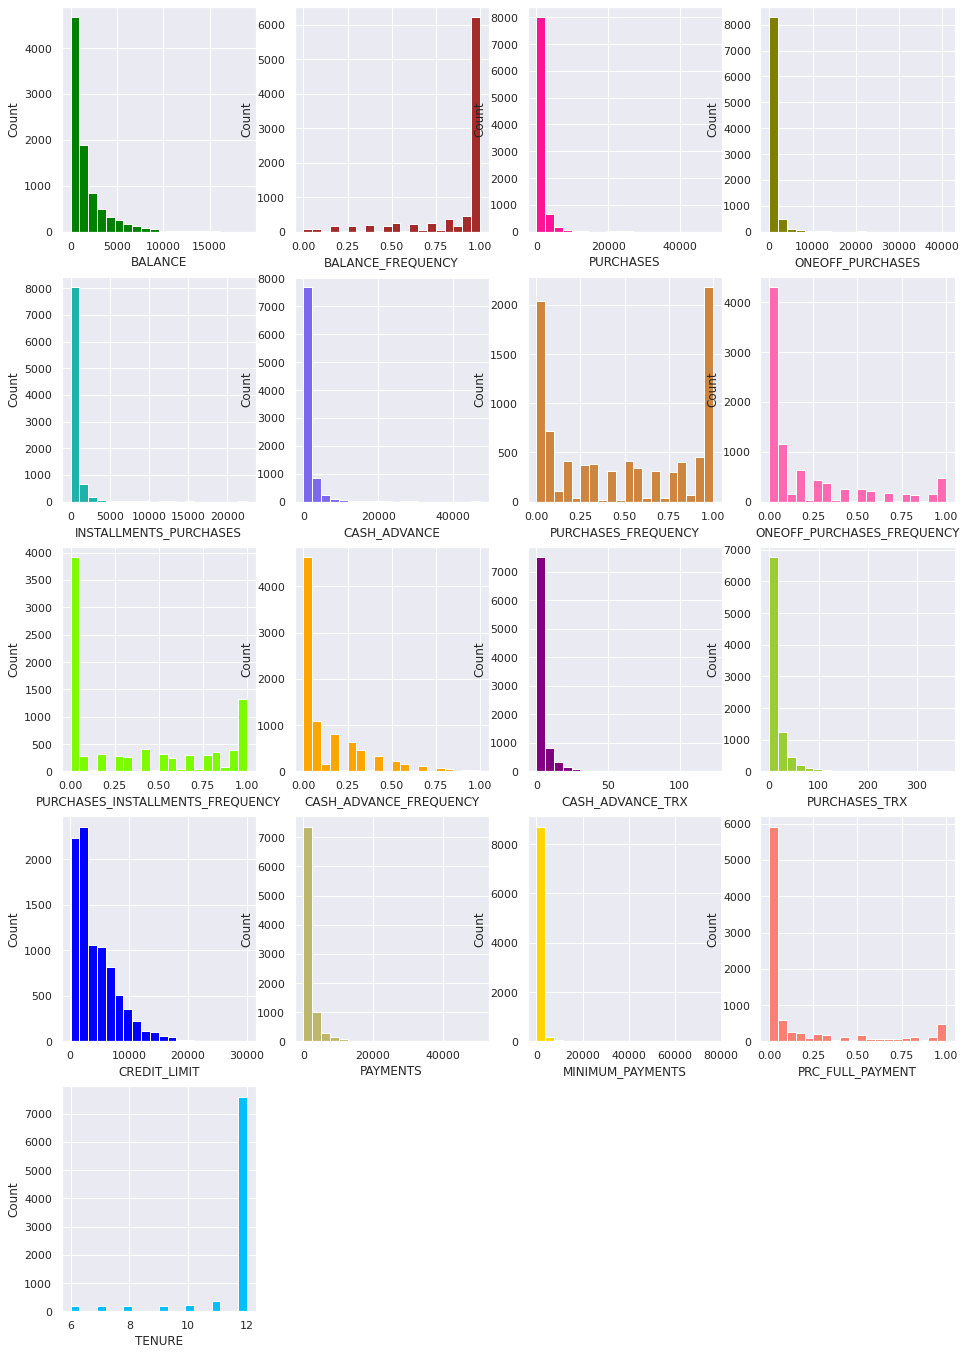

In [24]:
colors=['Green','Brown','DeepPink','Olive','LightSeaGreen','MediumSlateBlue','Peru','HotPink','LawnGreen','orange','Purple','YellowGreen','Blue','DarkKhaki','Gold','Salmon','DeepSkyBlue']
plt.figure(figsize=(16,24))

for col_name,color,plot in zip(Imputed_df.columns,colors,range(1,18)):
    plt.subplot(5,4,plot)
    sns.set(style='dark')
    plt.hist(Imputed_df[col_name],bins=20, color=color)
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.grid()
plt.show()

### **Bivariate & Multivariate Analysis**

<font color='blue'>**Let's check correlation**<font>  

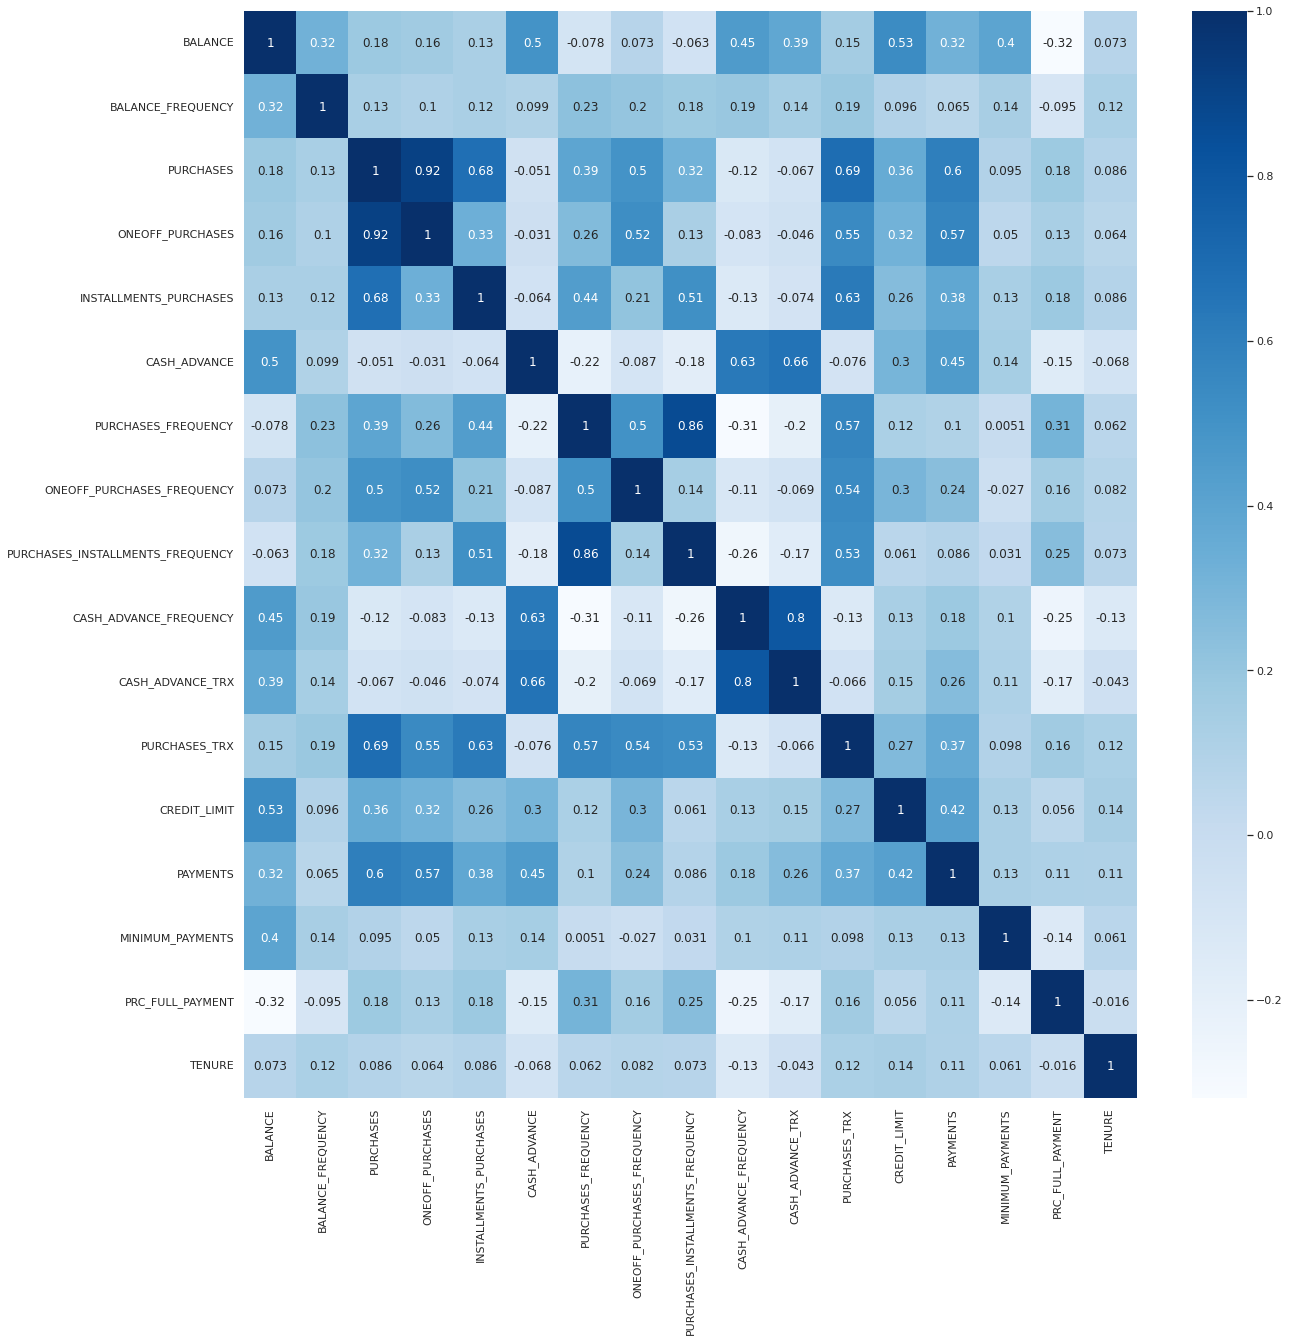

In [25]:
# Checking the correlation
correlation=Imputed_df.corr()
plt.figure(figsize=(20,20))
sns.set(style='dark')
sns.heatmap(correlation, annot=True, cmap='Blues')

<font color='blue'>**Let's draw scatter plot**<font>  

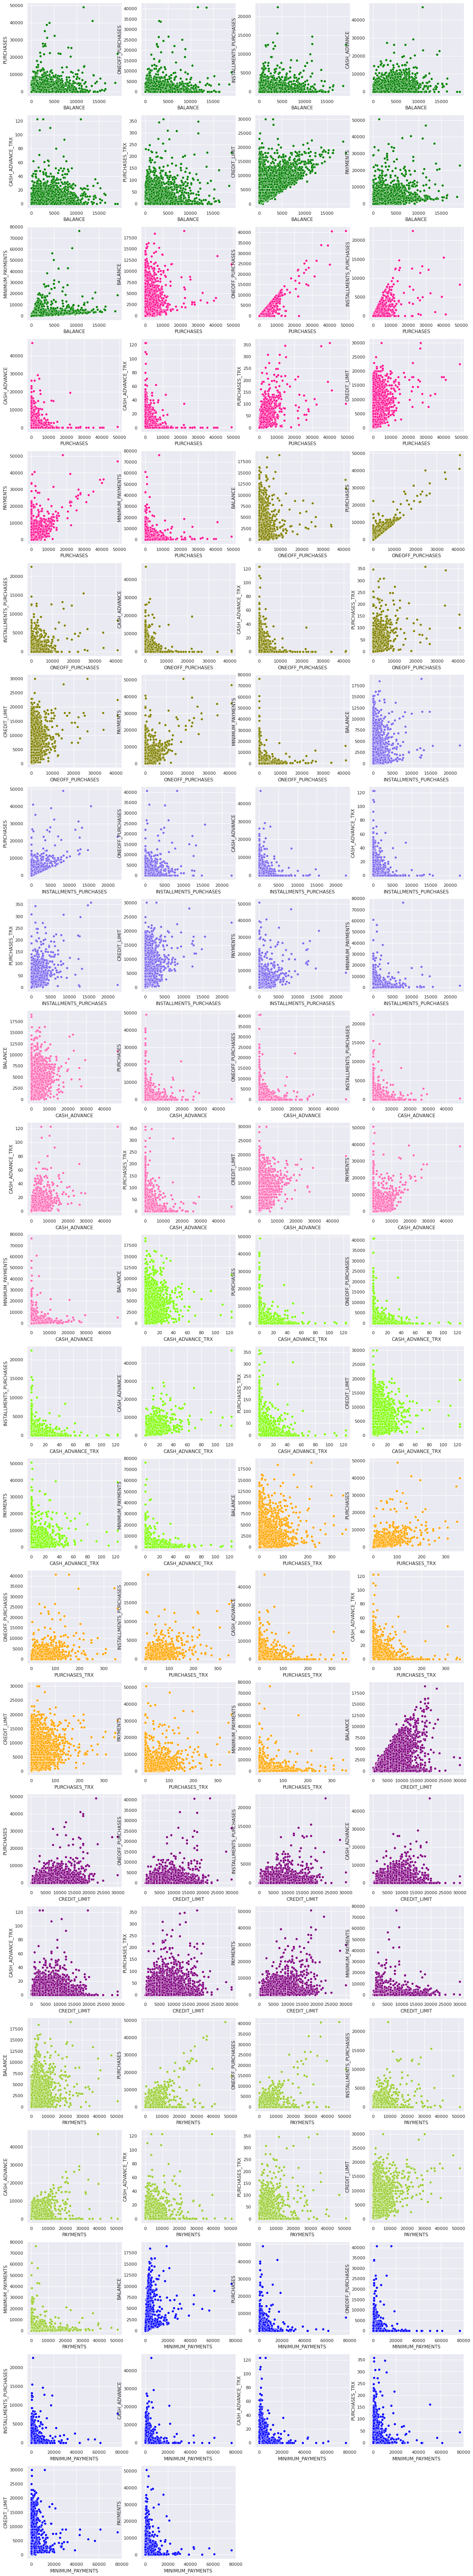

In [26]:
colors = ['Green', 'DeepPink', 'Olive', 'MediumSlateBlue', 'HotPink',
          'LawnGreen', 'orange', 'Purple', 'YellowGreen', 'Blue']
col_name = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
plot = 1
plt.figure(figsize=(20,120))
for col_name_1, color in zip(col_name, colors):
    for col_name_2 in (col_name):
        if col_name_1 == col_name_2:
            continue
        plt.subplot(23, 4, plot)
        sns.set(style='dark')
        sns.scatterplot(x=Imputed_df[col_name_1],y=Imputed_df[col_name_2], color=color)
        plt.xlabel(col_name_1)
        plt.ylabel(col_name_2)
        plt.grid()
        plot += 1
plt.show()

<font color='blue'>**Let's draw pair plot and kdeplot**<font>  

<Figure size 1440x360 with 0 Axes>

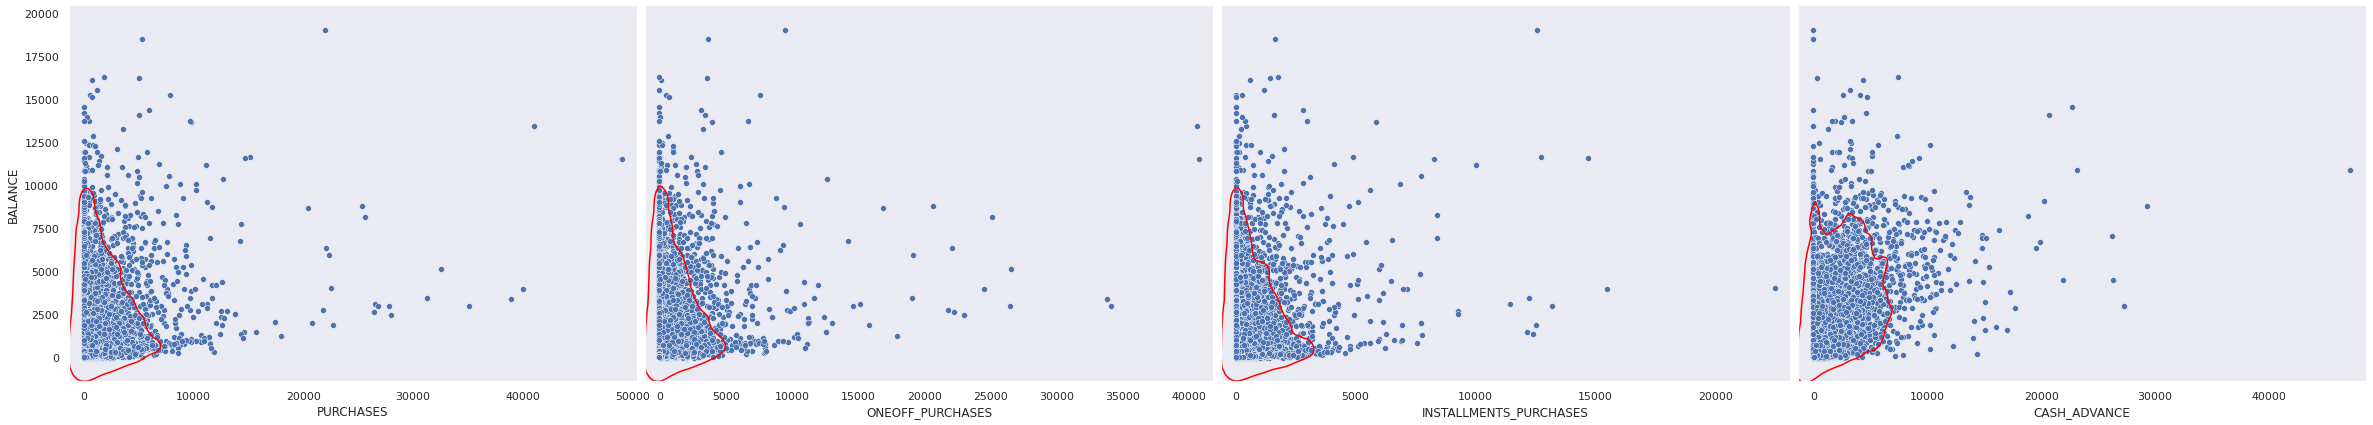

In [27]:
# Plotted the relationship between the features
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.pairplot(data=Imputed_df,x_vars=['PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'],
            y_vars=['BALANCE'], height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red')

<Figure size 1440x360 with 0 Axes>

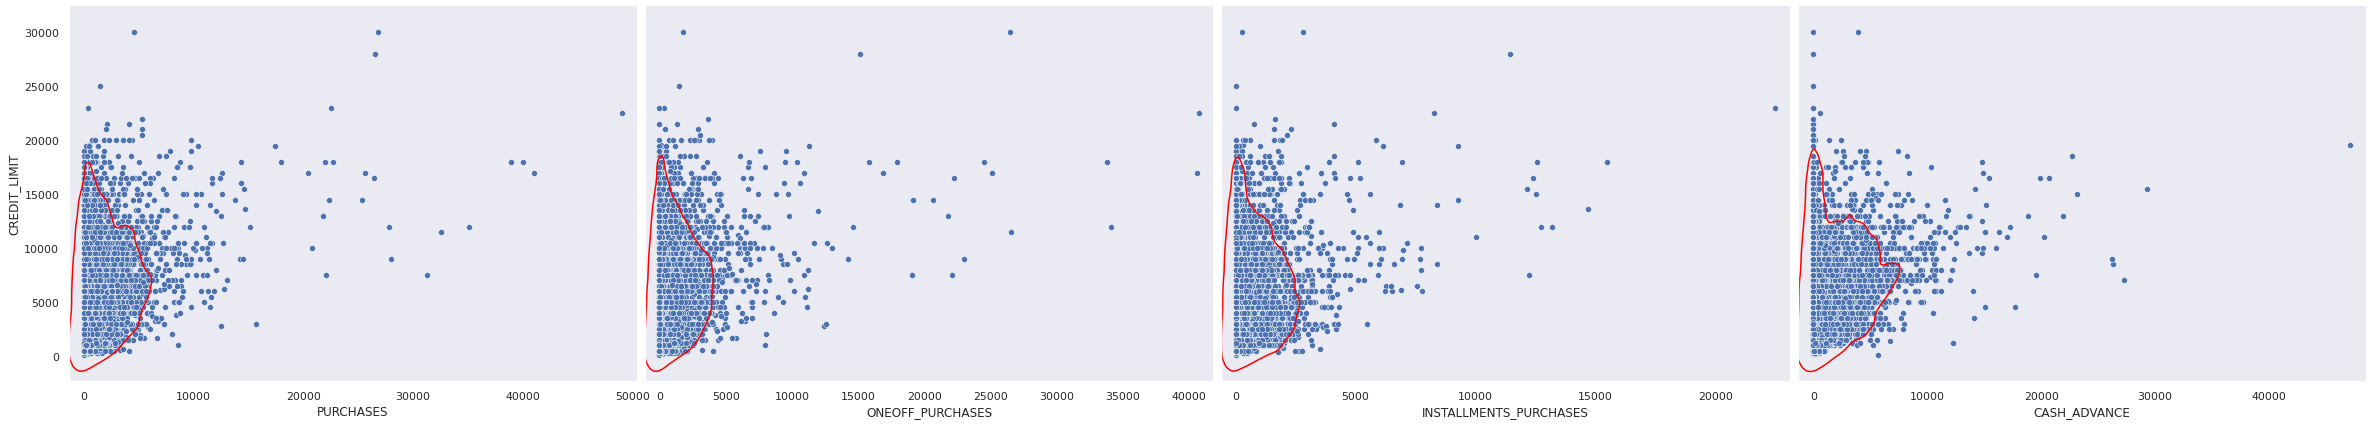

In [28]:
# Plotted the relationship between the features
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.pairplot(data=Imputed_df,x_vars=['PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'],
            y_vars=['CREDIT_LIMIT'], height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red')

<Figure size 1440x360 with 0 Axes>

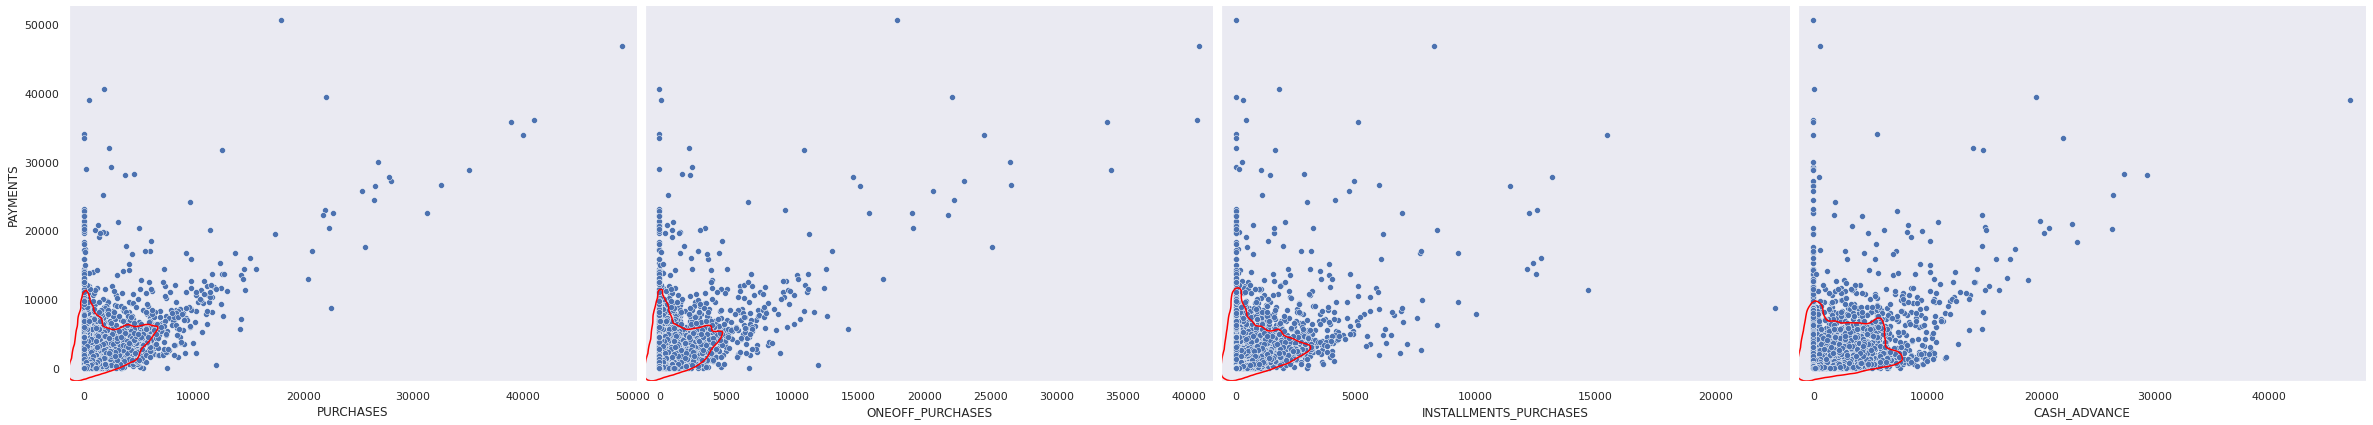

In [29]:
# Plotted the relationship between the features
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.pairplot(data=Imputed_df,x_vars=['PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'],
            y_vars=['PAYMENTS'], height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red')

<Figure size 1440x360 with 0 Axes>

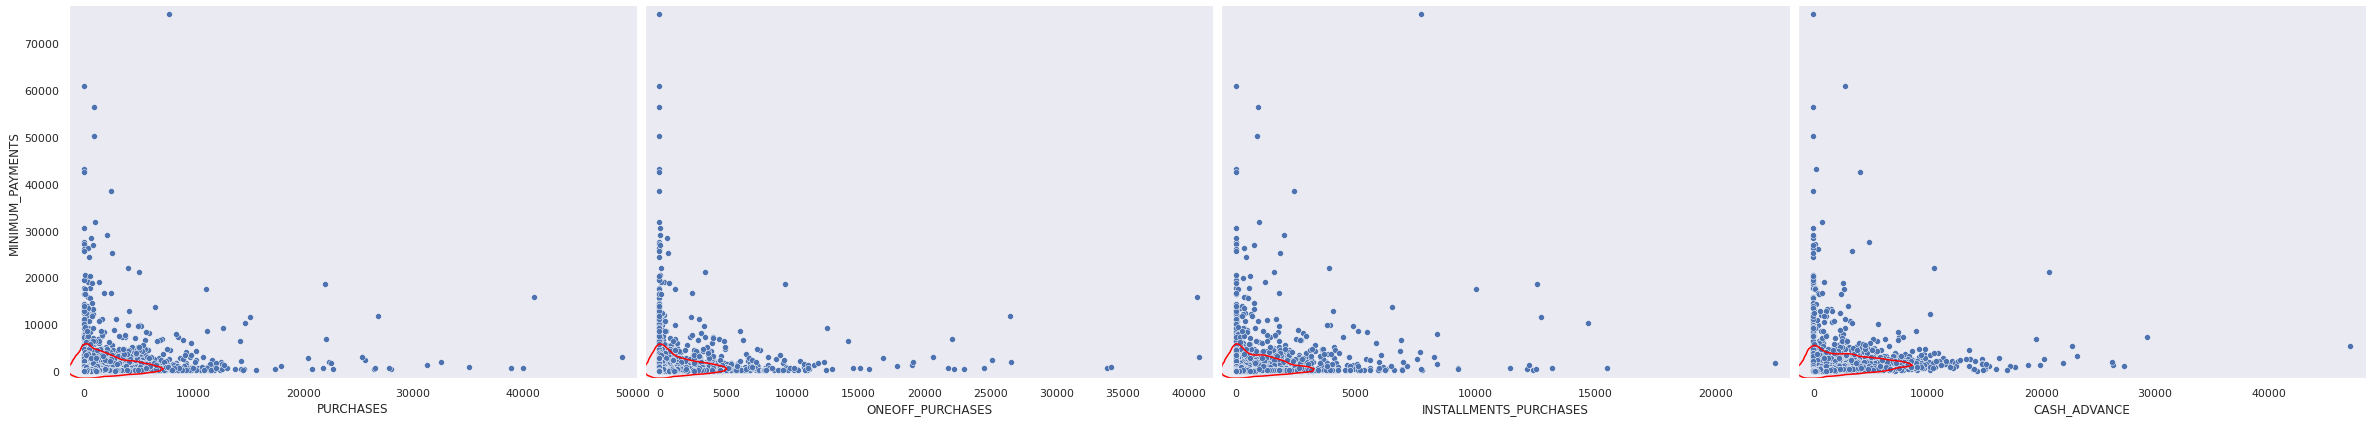

In [30]:
# Plotted the relationship between the features
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.pairplot(data=Imputed_df,x_vars=['PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'],
            y_vars=['MINIMUM_PAYMENTS'], height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red')

<font color='blue'>**Let's draw pie chart**<font>  

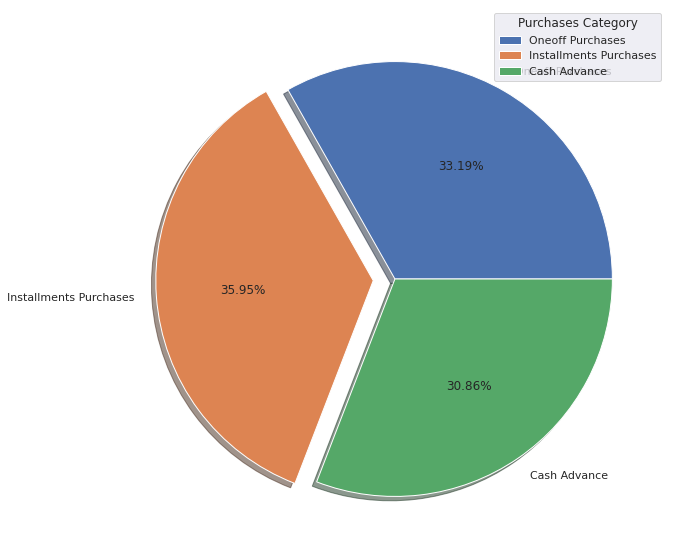

In [31]:
one_p=len(Imputed_df[Imputed_df['ONEOFF_PURCHASES'] > 0])
ins_p=len(Imputed_df[Imputed_df['INSTALLMENTS_PURCHASES'] > 0])
cash_a=len(Imputed_df[Imputed_df['CASH_ADVANCE'] > 0])

sports = ['Oneoff Purchases', 'Installments Purchases','Cash Advance']
participation=[one_p,ins_p,cash_a]
plt.figure(figsize=(10,10))
plt.pie(participation, labels=sports, autopct='%1.2f%%',explode=(0,.1,0),shadow=(0,0,.3,0)) 
plt.legend(title = "Purchases Category")
plt.show()

<font color='blue'>**Let's select most importent features**<font> 

We opted to omit other features since the goal of this project is clustering (customer segmentation), and we only process the clustering using a characteristic linked to customer behavior.

| **Attribute** | **Description** |
| --- | --- |
| CUST_ID | We believe that this feature only functions as an index. |
| BALANCE | We presumptively do not portray consumer behavior with this function.|
| PURCHASES |  We presum that the installment purchase and one-off purchase features have already discussed this function.|
| CASH_ADVANCE | We presume that this function displays the cash advance amount. Cash advance frequency is this characteristic. |
| CASH_ADVANCE_TRX | This feature, we believe, displays the total number of cash advances issued. Cash advance frequency is this characteristic. |
| PURCHASES_TRX | We think that this feature displays the total number of purchases. The frequency of purchases illustrates this trait. |
| CREDIT_LIMIT | This characteristic, it is assumed, does not depict consumer behavior. |
| PAYMENTS | We believe that this function displays the whole amount paid. |
| MINIMUM_PAYMENTS | This characteristic, it is assumed, does not depict consumer behavior. |
| TENURE | This characteristic, it is assumed, does not depict consumer behavior.|

In [7]:
# droppping unused features
Imputed_df.drop([ 'BALANCE','PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'TENURE'], axis=1, inplace=True, errors='ignore')
Impact_features=Imputed_df.copy()
Impact_features.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT'],
      dtype='object')

<font color='blue'>**Let's scale the features**<font> 

In [8]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_data=scaler.fit_transform(Impact_features)

Impact_features[['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT']]=scaled_data
Impact_features.sample(5)

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
4204           0.518084          0.797835                1.136787   
5498           0.518084         -0.131003               -0.346956   
1367           0.518084         -0.356934               -0.063384   
7225           0.518084         -0.356934               -0.454576   
7669          -1.784475         -0.347897               -0.454576   

      PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
4204             1.269843                    1.835423   
5498            -0.391225                   -0.119974   
1367             0.854576                   -0.678661   
7225            -1.221758                   -0.678661   
7669            -0.995249                   -0.373924   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
4204                          1.599199                0.577318   
5498                         -0.287947                1.413808   
1367                          1.179833                0.577318   
7225                         -0.916995               -0.259172   
7669                         -0.916995               -0.221149   

      PRC_FULL_PAYMENT  
4204         -0.214733  
5498          0.614116  
1367         -0.525551  
7225         -0.525551  
7669         -0.525551

# Step-4: Principal Component Analysis (PCA)
****

<font color='blue'>**Let's fit PCA**<font> 

In [9]:
from sklearn.decomposition import PCA

# running PCA with full components
PCA_data = PCA(n_components=len(Impact_features.columns), random_state = 12)
PCA_data.fit(Impact_features)

PCA(n_components=8, random_state=12)

In [35]:
PCA_data.n_components_

8

In [10]:
variance=PCA_data.explained_variance_ratio_
var = np.cumsum(variance)*100
var

array([ 36.431915,  53.51855 ,  67.94206 ,  77.6978  ,  87.144455,
        94.276764,  99.35349 , 100.      ], dtype=float32)

In [11]:
# extracted data
print('data extracted {0:.2f} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

data extracted 53.52 %


<font color='blue'>**Let's draw a line on a diagram**<font> 

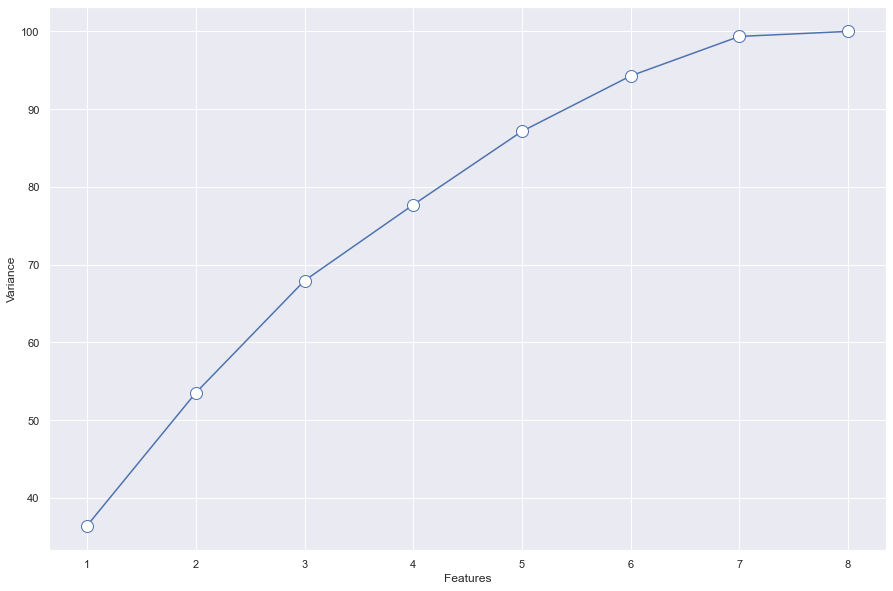

In [13]:
# Drawing a line on a diagram
plt.figure(figsize=(15,10))
sns.set(style='dark')
plt.plot(np.arange(len(Impact_features.columns))+1, var, color = 'b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'w', markersize = 12)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.grid()
plt.show()

<font color='blue'>**Let's select PCA**<font> 

In [14]:
# Reducing the dimensions of the data 
PAC_n = PCA(n_components = 2, random_state = 2022) 
PAC_principal = PAC_n.fit_transform(Impact_features)
PAC_principal = pd.DataFrame(PAC_principal) 
PAC_principal.columns = ['PCA1', 'PCA2']
PAC_principal.head()

PCA1      PCA2
0 -1.253175 -0.503716
1 -1.646849  0.134965
2  1.132696  1.221296
3 -1.340667 -0.254510
4 -1.286418  0.072096

In [15]:
PAC_n.explained_variance_ratio_

array([0.36431915, 0.17086649], dtype=float32)

<font color='blue'>**Let's draw a scatterplot**<font> 

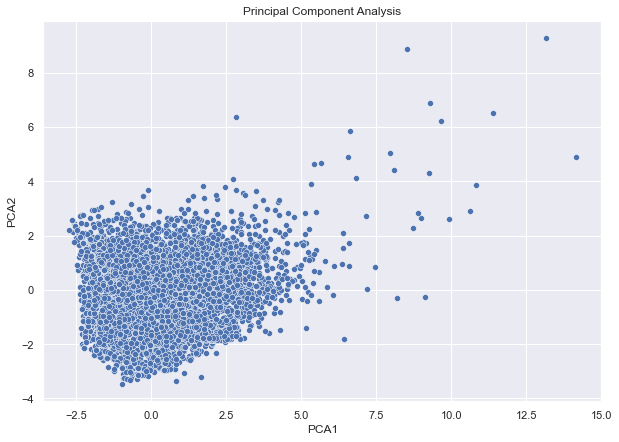

In [16]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.scatterplot(x=PAC_principal['PCA1'], y=PAC_principal['PCA2'])
plt.title('Principal Component Analysis')
plt.grid()

# Step-5: Clustering
****

  ### **Agglomerative Clustering**

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples # return information for each sample
import scipy.cluster.hierarchy as shc

In [18]:
AGG_PAC_principal=PAC_principal.copy()

<font color='blue'>**Let's draw a dendrogram**<font> 

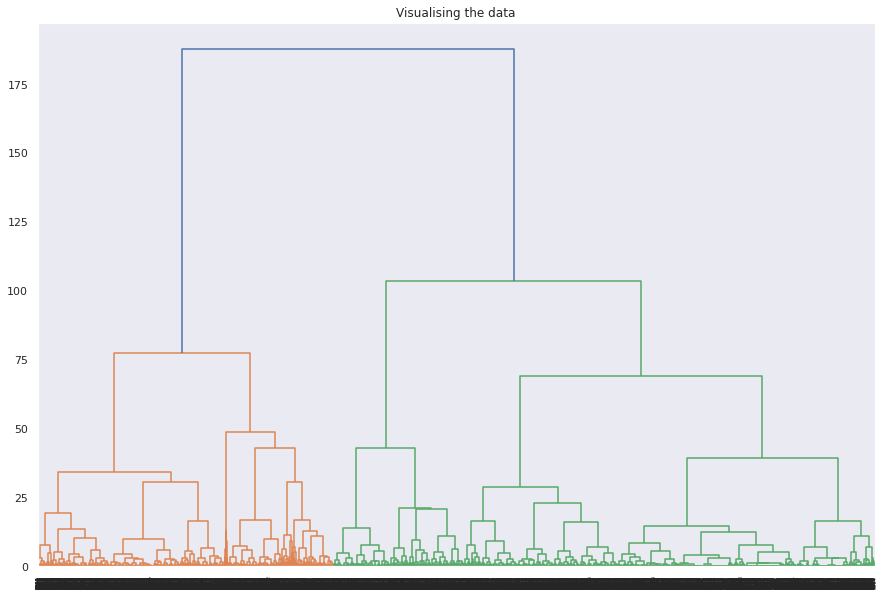

In [44]:
plt.figure(figsize =(15, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(AGG_PAC_principal, method ='ward')))

<font color='blue'>**Let's evaluate parameters**<font>

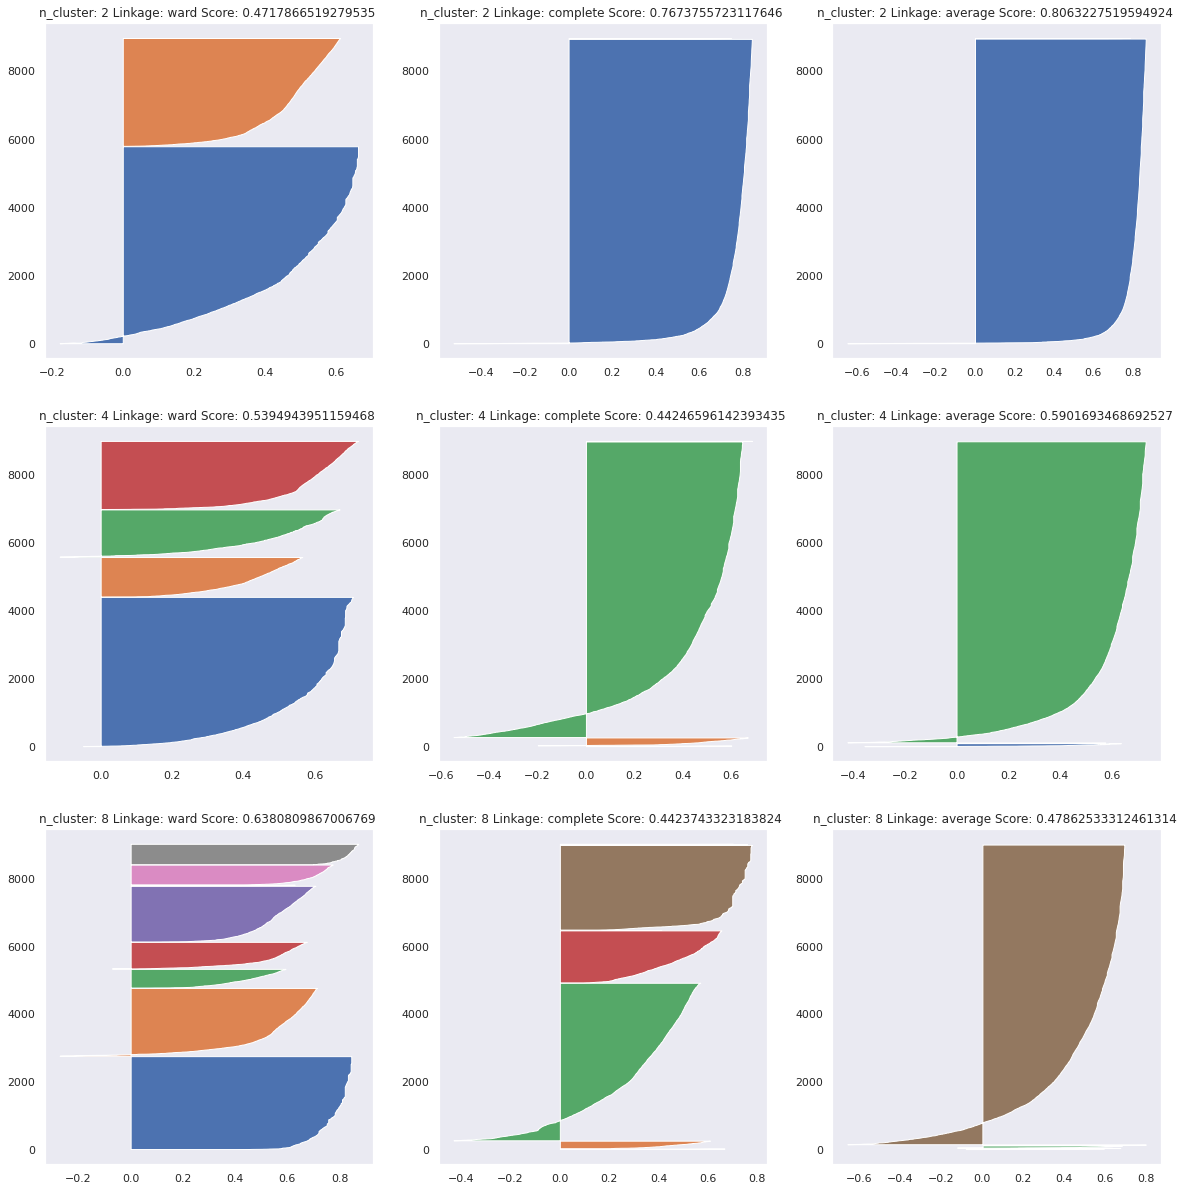

In [45]:
# evaluating model parameter  using linkage and user define cluster
plt.figure(figsize=(20,21))
plot=1
ks = [2,4,8]
linkage = ('ward', 'complete','average')

for k in ks:
    for link in linkage:
        agg = AgglomerativeClustering(n_clusters=k, linkage=link)
        AGG_PAC_principal['Cluster'] = agg.fit_predict(PAC_principal)
        sscore = silhouette_score(AGG_PAC_principal, AGG_PAC_principal['Cluster'])
        ssample = silhouette_samples(AGG_PAC_principal, AGG_PAC_principal['Cluster'])
        ylow = 10

        for cluster in range(agg.n_clusters):
            cluster_samples = ssample[AGG_PAC_principal['Cluster'] == cluster]
            cluster_samples.sort()
            yup = ylow + cluster_samples.shape[0]
            plt.subplot(3, 3, plot)
            sns.set(style='dark')
            plt.fill_betweenx(np.arange(ylow, yup), 0, cluster_samples)
            ylow = yup + 10
        plt.title(f'n_cluster: {k} Linkage: {link} Score: {sscore} ')
        plot += 1
plt.show()

<font color='blue'>**Let's choose technique**<font> 

In [46]:
ks=[2,4,8]
print(f'| linkage: ward |')

for k in range(len(ks)):
    agg = AgglomerativeClustering(n_clusters=ks[k], linkage='ward')
    AGG_PAC_principal['Cluster'] = agg.fit_predict(PAC_principal)
    AGG_s_score = silhouette_score(AGG_PAC_principal, AGG_PAC_principal['Cluster'])
    print(f' n_cluster: {ks[k]}    Score: {AGG_s_score}')

| linkage: ward |
 n_cluster: 2    Score: 0.4717866519279535
 n_cluster: 4    Score: 0.5394943951159468
 n_cluster: 8    Score: 0.6380809867006769


The ward method's clusters are superior than the complete and average methods. The greatest silhouette score, 0.63, comes from its 'n clusters' eight. However, the silhouette score of the fourth of the 'n clusters' is 0.53 and is almost equal to the maximum score.
So, as a sample of agglomerative clustering, we choose the ward technique and its 'n clusters'four.

<font color='blue'>**Let's predict cluster**<font> 

In [19]:
AGG_PAC_principal=PAC_principal.copy()
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
AGG_PAC_principal['Cluster'] = agg.fit_predict(PAC_principal)
AGG_PAC_principal.sample(5)

PCA1      PCA2  Cluster
5553 -1.782865  0.629625        0
6672 -0.900912 -0.377438        0
1140 -1.339895  0.353269        0
5307 -1.237247 -0.019371        0
6224 -0.622145 -0.287725        0

<font color='blue'>**Let's check population of every cluster**<font> 

In [20]:
# Checking value of each cluster
AGG_PAC_principal['Cluster'].value_counts()

0    4392
3    2005
2    1391
1    1162
Name: Cluster, dtype: int64

<font color='blue'>**Let's draw a scatterplot as per cluster**<font> 

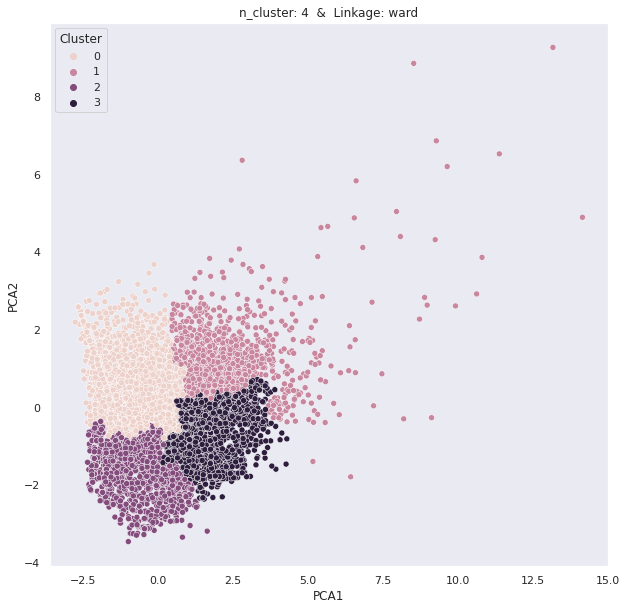

In [49]:
# evaluating model parameter using linkage and user define cluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=AGG_PAC_principal, x='PCA1',y='PCA2',hue='Cluster' )
plt.title(f'n_cluster: 4  &  Linkage: ward')
plt.show()

###  **K-means Clustering**

In [21]:
KMeans_PAC_principal=PAC_principal.copy()

<font color='blue'>**Let's train the model**<font> 

In [22]:
from sklearn.cluster import KMeans

cluster=KMeans()
cluster.fit(KMeans_PAC_principal) 

KMeans()

In [23]:
# Checking the cluster centers
cluster.cluster_centers_

array([[-6.5454887e-03,  1.6124338e-01],
       [-1.5040158e+00,  2.1646462e-01],
       [ 1.4336778e+00, -9.7377515e-01],
       [ 1.3104377e+00,  1.1123233e+00],
       [-1.0405686e+00, -1.8119097e+00],
       [ 3.1790993e+00,  6.3492525e-01],
       [ 8.2744207e+00,  3.6652610e+00],
       [-1.7726035e+00,  1.4036877e+00]], dtype=float32)

In [53]:
# printing parameter
cluster.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [54]:
# Checking number of cluster
cluster.n_clusters

8

<font color='blue'>**Let's define value of inertia**<font> 

In [24]:
# define value of inertia as per n_clusters
inertia=np.array([[0,0]]) 
for k in range(2,11):
    kcluster=KMeans(n_clusters=k)
    kcluster.fit(KMeans_PAC_principal)
    inertia=np.append(inertia,[[k,kcluster.inertia_]],axis=0)
inertia

array([[0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.97511914e+04],
       [3.00000000e+00, 1.46267168e+04],
       [4.00000000e+00, 1.11311562e+04],
       [5.00000000e+00, 8.93598242e+03],
       [6.00000000e+00, 7.77371973e+03],
       [7.00000000e+00, 6.79570410e+03],
       [8.00000000e+00, 5.90859375e+03],
       [9.00000000e+00, 5.10352734e+03],
       [1.00000000e+01, 4.51337842e+03]])

First one refers number of K and other one refers the value of inertia for that k 

<font color='blue'>**Let's draw a line plot using the Elbow method**<font> 

Text(0, 0.5, 'Value of inertia_')

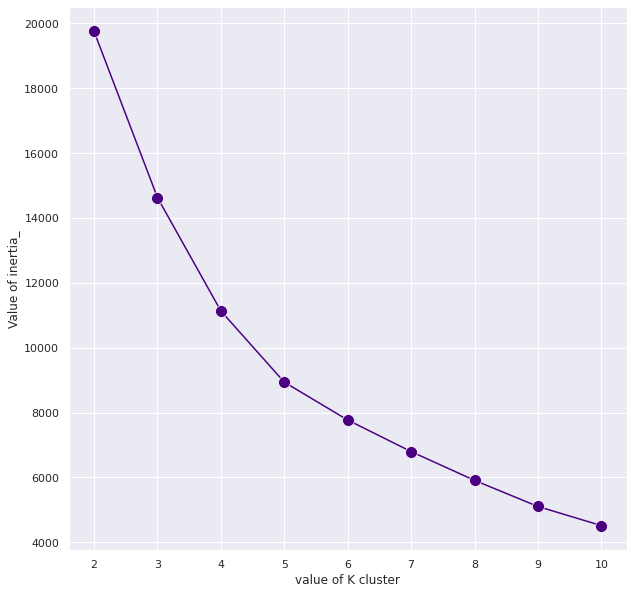

In [56]:
# Drawing lineplot
plt.figure(figsize=(10,10))
sns.set(style='dark')
sns.lineplot(x=inertia[1:,0],y=inertia[1:,1],color = 'Indigo',marker = 'o',linestyle = 'solid',markerfacecolor = 'Indigo', markersize = 12)
plt.grid()
plt.xlabel('value of K cluster')
plt.ylabel('Value of inertia_')

Here the cluster number 'four' gives the most significant value, so we chose n_cluster=4 for clustering.

In [25]:
# Again  the model is trained using K=4
cluster=KMeans(n_clusters=4,random_state=22) 
cluster.fit(KMeans_PAC_principal)

KMeans(n_clusters=4, random_state=22)

<font color='blue'>**Let's predict cluster**<font> 

In [26]:
KMeans_predicted_value=cluster.predict(KMeans_PAC_principal)
KMeans_PAC_principal['Cluster']=KMeans_predicted_value
KMeans_PAC_principal.sample(5)

PCA1      PCA2  Cluster
6296  2.345041  1.140866        0
3245 -1.324491  0.741477        2
5025 -1.687478  0.412628        2
3156  1.966686  0.080625        0
7829  2.454905 -1.828755        3

<font color='blue'>**Let's check population of every cluster**<font> 

In [27]:
# Checking value of each cluster
KMeans_PAC_principal['Cluster'].value_counts()


2    3762
3    2582
0    1345
1    1261
Name: Cluster, dtype: int64

<font color='blue'>**Let's draw a scatterplot as per KMeans cluster**<font> 

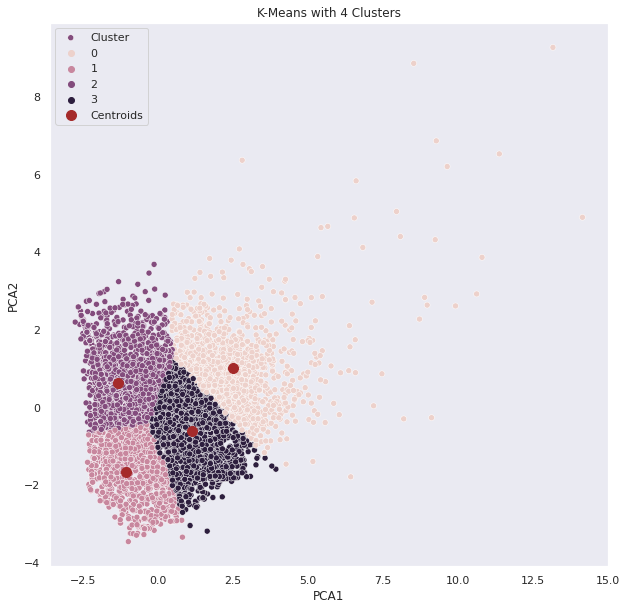

In [61]:
from cProfile import label
# drawing Scatterplot for each cluster
plt.figure(figsize=(10,10))
sns.scatterplot(data=KMeans_PAC_principal, x='PCA1',y='PCA2',hue='Cluster',label='Cluster' )
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s = 100,c = 'brown', label = 'Centroids', marker = 'o')
plt.title('K-Means with 4 Clusters')
plt.legend()
plt.show()

### **KMedoids Clustering**

In [ ]:
%pip install scikit-learn-extra

In [63]:
KMedoids_PAC_principal=PAC_principal.copy()

<font color='blue'>**Let's train the model**<font> 

In [64]:
from sklearn_extra.cluster import KMedoids
cluster=KMedoids()
cluster.fit(KMedoids_PAC_principal) 

KMedoids()

In [65]:
# Checking the cluster centers
cluster.cluster_centers_

array([[ 1.2439913 , -0.4698425 ],
       [ 0.9588469 ,  1.0947164 ],
       [ 2.8070617 ,  0.66418415],
       [-0.28311795,  0.04751043],
       [-1.4783885 , -1.6229427 ],
       [-1.8426306 ,  1.053678  ],
       [ 1.4144958 , -1.6834114 ],
       [-1.5920893 ,  0.19562922]], dtype=float32)

In [66]:
# printing parameter
cluster.get_params()

{'init': 'heuristic',
 'max_iter': 300,
 'method': 'alternate',
 'metric': 'euclidean',
 'n_clusters': 8,
 'random_state': None}

In [67]:
# Checking number of cluster
cluster.n_clusters

8

<font color='blue'>**Let's define value of inertia**<font> 

In [68]:
# define value of inertia as per n_clusters
inertia=np.array([[0,0]]) 
for k in range(2,11):
    kcluster=KMeans(n_clusters=k)
    kcluster.fit(KMedoids_PAC_principal)
    inertia=np.append(inertia,[[k,kcluster.inertia_]],axis=0)
inertia

array([[0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.97511680e+04],
       [3.00000000e+00, 1.46267842e+04],
       [4.00000000e+00, 1.11301758e+04],
       [5.00000000e+00, 8.93608984e+03],
       [6.00000000e+00, 7.78513867e+03],
       [7.00000000e+00, 6.78547754e+03],
       [8.00000000e+00, 5.90774805e+03],
       [9.00000000e+00, 5.10218262e+03],
       [1.00000000e+01, 4.51288867e+03]])

first one refers number of 'K' and other one refers the value of inertia for that 'k' 

<font color='blue'>**Let's draw a lineplot as value of inertia**<font> 

Text(0, 0.5, 'Value of inertia_')

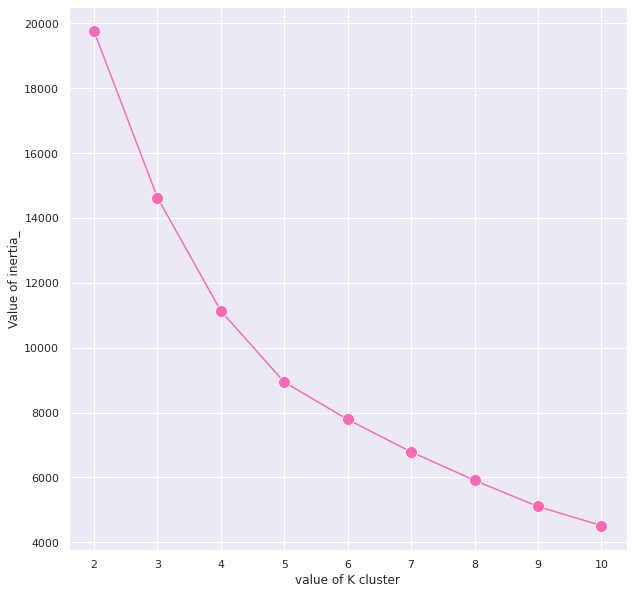

In [69]:
# Drawing lineplot
plt.figure(figsize=(10,10))
sns.set(style='dark')
sns.lineplot(x=inertia[1:,0],y=inertia[1:,1],color = 'HotPink',marker = 'o',linestyle = 'solid',markerfacecolor = 'HotPink', markersize = 12)
plt.grid()
plt.xlabel('value of K cluster')
plt.ylabel('Value of inertia_')

In [70]:
# Again  the model is trained using K=4
cluster=KMedoids(n_clusters=4,random_state=22) 
cluster.fit(KMedoids_PAC_principal)

KMedoids(n_clusters=4, random_state=22)

<font color='blue'>**Let's predict cluster**<font> 

In [71]:
KMedoids_predicted_value=cluster.predict(KMedoids_PAC_principal)
KMedoids_PAC_principal['Cluster']=KMedoids_predicted_value
KMedoids_PAC_principal.sample(5)

PCA1      PCA2  Cluster
993   0.047568 -0.455740        0
5331  1.254380  1.360334        1
8161  0.527918 -0.445799        0
842   1.767166  3.371726        1
3072  0.929022 -1.740177        0

In [72]:
# Checking value of each cluster
KMedoids_PAC_principal['Cluster'].value_counts()

2    2805
0    2453
3    1943
1    1749
Name: Cluster, dtype: int64

<font color='blue'>**Let's draw a scatterplot as per KMedoids cluster**<font> 

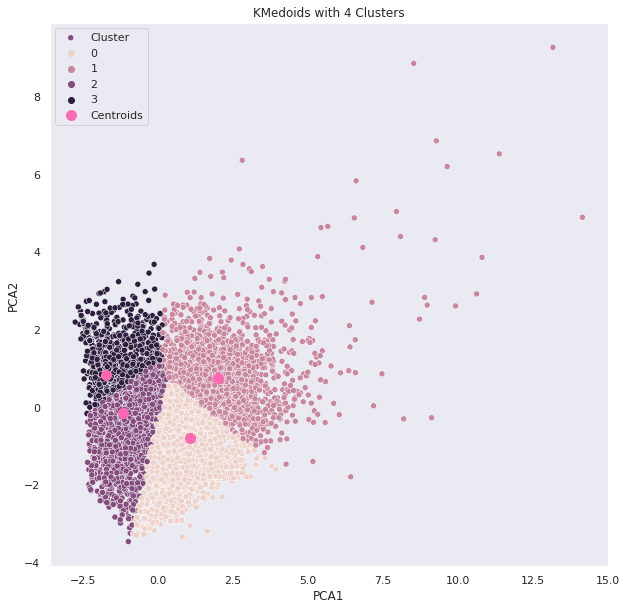

In [73]:
from cProfile import label
# drawing Scatterplot for each cluster
plt.figure(figsize=(10,10)) 
sns.scatterplot(data=KMedoids_PAC_principal, x='PCA1',y='PCA2',hue='Cluster',label='Cluster' )
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s = 100,c = 'HotPink', label = 'Centroids', marker = 'o')
plt.title('KMedoids with 4 Clusters')
plt.legend()
plt.show()

# Step-6: Model comparison
****

<font color='blue'>**Let's compare the best cluster of each model** <font> 

In [74]:
# Agglomerative with Linkage ward and n_cluster = 4
Agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
AGG_PAC_principal['Cluster'] = Agg.fit_predict(PAC_principal)
AGG_S_sscore = silhouette_score(AGG_PAC_principal, AGG_PAC_principal['Cluster'])
print(f'Agglomerative: n_cluster = 4 silhouette_score = {AGG_S_sscore}')

Agglomerative: n_cluster = 4 silhouette_score = 0.5394943951159468


In [28]:
# KMeans with n_cluster = 4
KMeans_score=silhouette_score(KMeans_PAC_principal,KMeans_PAC_principal['Cluster'])
print(f'KMeans: n_cluster = 4    silhouette_score = {KMeans_score}')

KMeans: n_cluster = 4    silhouette_score = 0.5494619090436523


In [76]:
# KMedoids with n_cluster = 4
KMedoids_score=silhouette_score(KMedoids_PAC_principal,KMedoids_PAC_principal['Cluster'])
print(f'KMedoids: n_cluster = 4    silhouette_score = {KMedoids_score}')

KMedoids: n_cluster = 4    silhouette_score = 0.43690173092601625


<font color='blue'>**Let's draw a DataFrame** <font> 

In [77]:
com_df = pd.DataFrame({'Models' : ['Agglomerative', 'K-Means','KMedoids'],
                       'N Cluster' : [4, 4, 4],
                       'Silhouette Score' : [AGG_S_sscore, KMeans_score,KMedoids_score],
                     })
com_df

Models  N Cluster  Silhouette Score
0  Agglomerative          4          0.539494
1        K-Means          4          0.549462
2       KMedoids          4          0.436902

The best model is KMeans which Silhouette Score is greater than other, we choice kMeans for clustering the dataset

<font color='blue'>**Let's add the cluster to the DataFrame** <font>

In [29]:
Clustered_df = pd.concat([data, pd.DataFrame({'CLUSTER':KMeans_predicted_value})], axis = 1)
Clustered_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000               NaN          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

In [30]:
# Checking value of each cluster
Clustered_df['CLUSTER'].value_counts()

2    3762
3    2582
0    1345
1    1261
Name: CLUSTER, dtype: int64

# Step-7: Cluster Analysis
****

<font color='blue'>**Let's separate the DataFrame according to clusters** <font>

In [31]:
# separating the dataframe by cluster
CLUSTER_0 = Clustered_df[Clustered_df['CLUSTER'] == 0]
CLUSTER_1 = Clustered_df[Clustered_df['CLUSTER'] == 1]
CLUSTER_2 = Clustered_df[Clustered_df['CLUSTER'] == 2]
CLUSTER_3 = Clustered_df[Clustered_df['CLUSTER'] == 3]

In [32]:
CLUSTER_0.shape, CLUSTER_1.shape, CLUSTER_2.shape, CLUSTER_1.shape

((1345, 19), (1261, 19), (3762, 19), (1261, 19))

<font color='blue'>**Let's summarize for each cluster** <font> 

In [33]:
# Summary for each cluster
col_name = ['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
Table={}
for i in col_name:  
    Table[i] = pd.DataFrame(Clustered_df.groupby('CLUSTER', axis = 0)[i].describe()[['min','mean','max','std','50%' ]])

pd.concat(Table, axis =0)

min         mean           max  \
                       CLUSTER                                          
BALANCE                0         12.423203  2348.725977  19043.138560   
                       1          0.000000   132.096220   5347.377116   
                       2          0.488050  2225.554633  16304.889250   
                       3          0.000000   892.294116  16115.596400   
PURCHASES              0          8.400000  3898.567428  49039.570000   
                       1          0.000000   271.963418   3044.600000   
                       2          0.000000   270.202334   4900.000000   
                       3         12.000000   920.086375   6897.560000   
ONEOFF_PURCHASES       0          0.000000  2623.018082  40761.250000   
                       1          0.000000   155.208834   3044.600000   
                       2          0.000000   226.869258   4900.000000   
                       3          0.000000   280.849985   4768.270000   
INSTALLMENTS_PURCHASES 0          0.000000  1275.995442  22500.000000   
                       1          0.000000   116.989952   1859.340000   
                       2          0.000000    43.571071   1770.570000   
                       3          0.000000   639.582823   6897.560000   
CREDIT_LIMIT           0        300.000000  7211.055762  30000.000000   
                       1        300.000000  3726.457672  23000.000000   
                       2         50.000000  4230.813719  19600.000000   
                       3        300.000000  3838.226279  21500.000000   
PAYMENTS               0          0.000000  3914.496729  50721.483360   
                       1          0.000000  1190.344468  34107.074990   
                       2          0.000000  1502.739468  39048.597620   
                       3          0.000000  1197.641023  40627.595240   
MINIMUM_PAYMENTS       0          3.197940  1082.668387  76406.207520   
                       1          0.019163   176.917899   4287.236670   
                       2          5.038210  1030.679247  61031.618600   
                       3          0.261984   792.534525  56370.041170   

                                        std          50%  
                       CLUSTER                            
BALANCE                0        2652.073131  1388.825312  
                       1         341.607180    23.852869  
                       2        2145.298144  1498.235452  
                       3        1478.180538   259.188749  
PURCHASES              0        4244.393682  2814.230000  
                       1         373.328564   136.710000  
                       2         502.104800    35.520000  
                       3         769.817102   672.790000  
ONEOFF_PURCHASES       0        3488.705564  1676.110000  
                       1         352.707966     0.000000  
                       2         479.759571     0.000000  
                       3         533.978828     0.000000  
INSTALLMENTS_PURCHASES 0        1829.114412   759.800000  
                       1         193.211542    12.650000  
                       2         135.132053     0.000000  
                       3         606.150206   454.050000  
CREDIT_LIMIT           0        4356.210460  6500.000000  
                       1        3235.434739  3000.000000  
                       2        3323.797797  3000.000000  
                       3        3186.312241  2700.000000  
PAYMENTS               0        4824.968506  2482.014766  
                       1        2775.211321   372.572278  
                       2        2308.958754   768.741049  
                       3        1556.070571   773.346949  
MINIMUM_PAYMENTS       0        2757.040089   436.253648  
                       1         305.279123   116.578268  
                       2        2343.505874   510.304379  
                       3        2610.348614   186.053091

<font color='blue'>**Let's compare the balance according to each cluster** <font> 

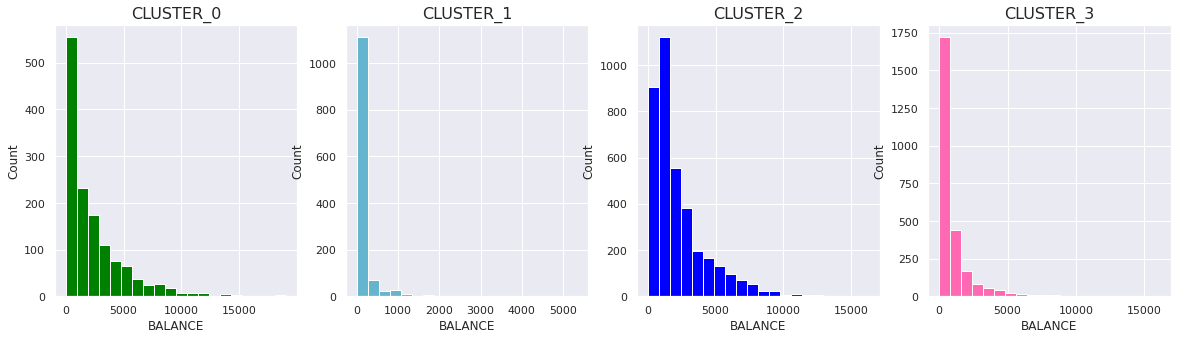

In [83]:
# Comparison the balance according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['BALANCE'],bins=20, color = 'Green')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('BALANCE')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['BALANCE'], bins=20,color='c' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('BALANCE')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['BALANCE'], bins=20,color='blue')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('BALANCE')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['BALANCE'], bins=20,color='HotPink')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('BALANCE')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the purchases according to each cluster** <font> 

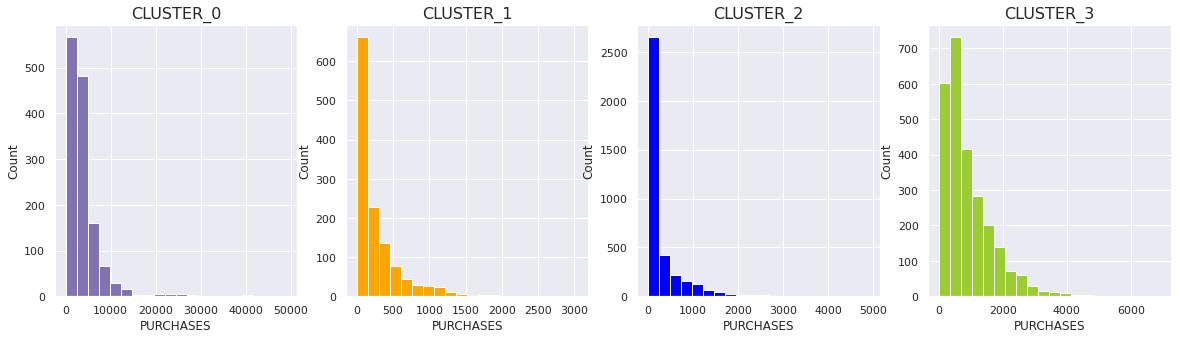

In [84]:
# Comparison the purchases according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['PURCHASES'],bins=20, color = 'm')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['PURCHASES'], bins=20,color='orange' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['PURCHASES'], bins=20,color='blue')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['PURCHASES'], bins=20,color='YellowGreen')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the oneoff-purchases according to each cluster** <font> 

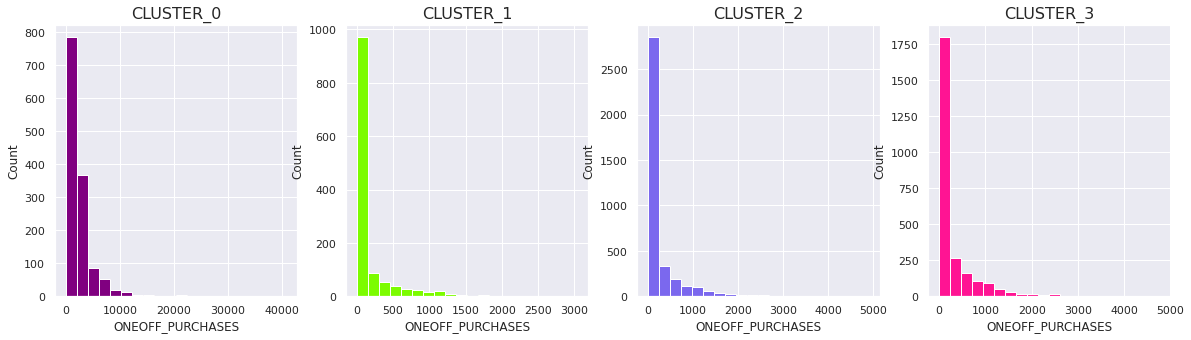

In [85]:
# Comparison the oneoff-purchases according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['ONEOFF_PURCHASES'],bins=20, color = 'Purple')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['ONEOFF_PURCHASES'], bins=20,color='LawnGreen' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['ONEOFF_PURCHASES'], bins=20,color='MediumSlateBlue')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['ONEOFF_PURCHASES'], bins=20,color='DeepPink')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the installments-purchases according to each cluster** <font> 

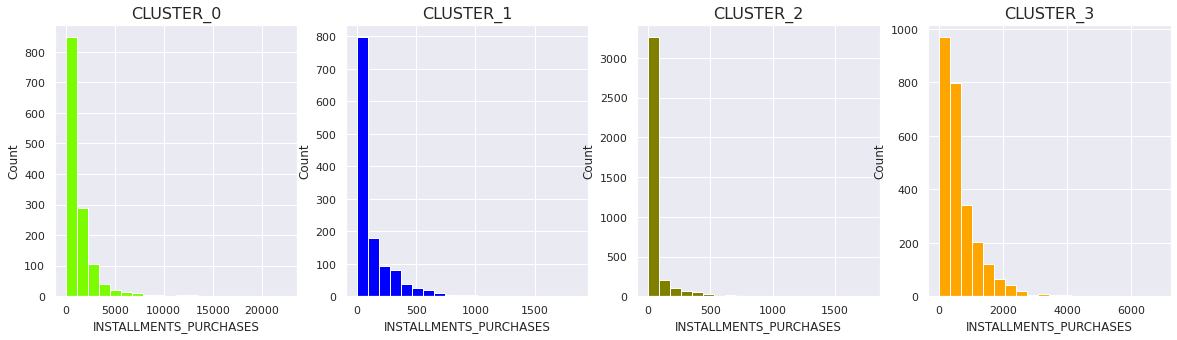

In [86]:
# Comparison the installments-purchases according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['INSTALLMENTS_PURCHASES'],bins=20, color = 'LawnGreen')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['INSTALLMENTS_PURCHASES'], bins=20,color='Blue' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['INSTALLMENTS_PURCHASES'], bins=20,color='Olive')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['INSTALLMENTS_PURCHASES'], bins=20,color='orange')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the cash-advance according to each cluster** <font> 

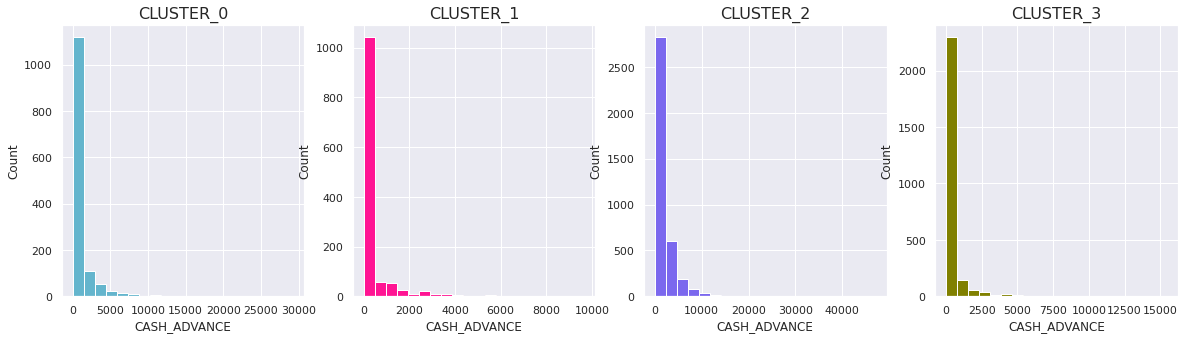

In [87]:
# Comparison the cash-advance according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['CASH_ADVANCE'],bins=20, color = 'c')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['CASH_ADVANCE'], bins=20,color='DeepPink' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['CASH_ADVANCE'], bins=20,color='MediumSlateBlue')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['CASH_ADVANCE'], bins=20,color='Olive')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the credit-limit according to each cluster** <font> 

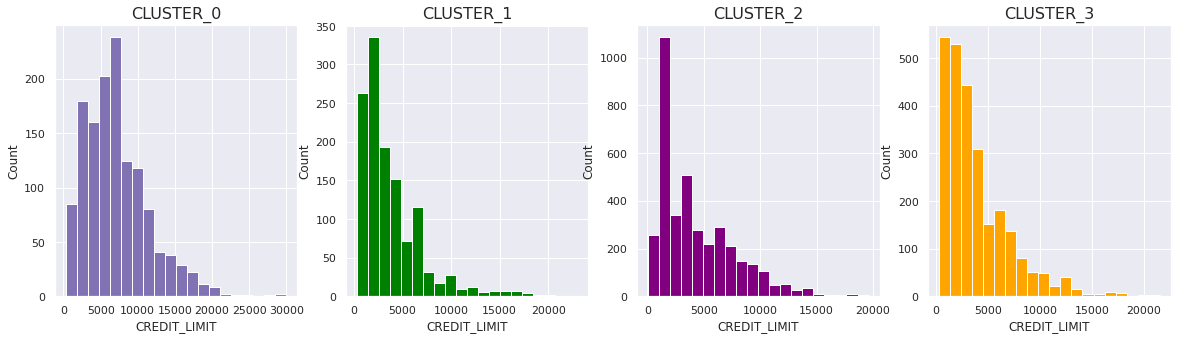

In [88]:
# Comparison the credit-limit according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['CREDIT_LIMIT'],bins=20, color = 'm')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['CREDIT_LIMIT'], bins=20,color='Green' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['CREDIT_LIMIT'], bins=20,color='Purple')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['CREDIT_LIMIT'], bins=20,color='orange')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the payments according to each cluster** <font> 

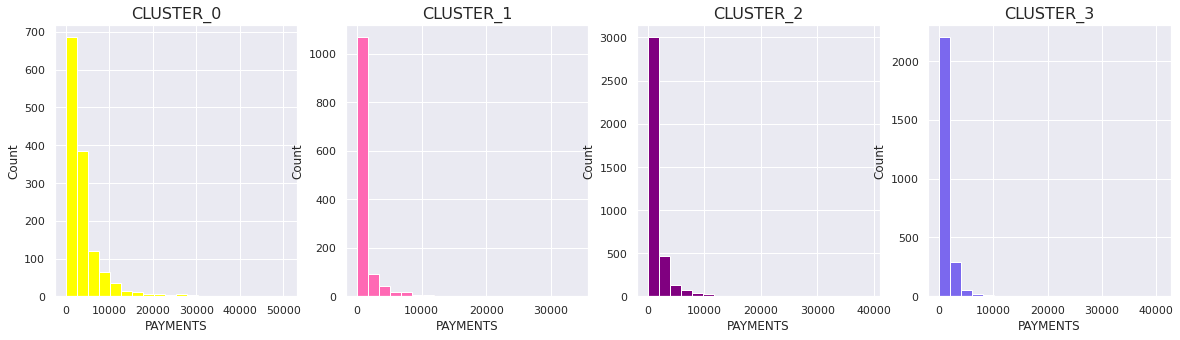

In [89]:
# Comparison the payments according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['PAYMENTS'],bins=20, color = 'yellow')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['PAYMENTS'], bins=20,color='HotPink' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['PAYMENTS'], bins=20,color='Purple')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['PAYMENTS'], bins=20,color='MediumSlateBlue')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the minimum-payments according to each cluster** <font> 

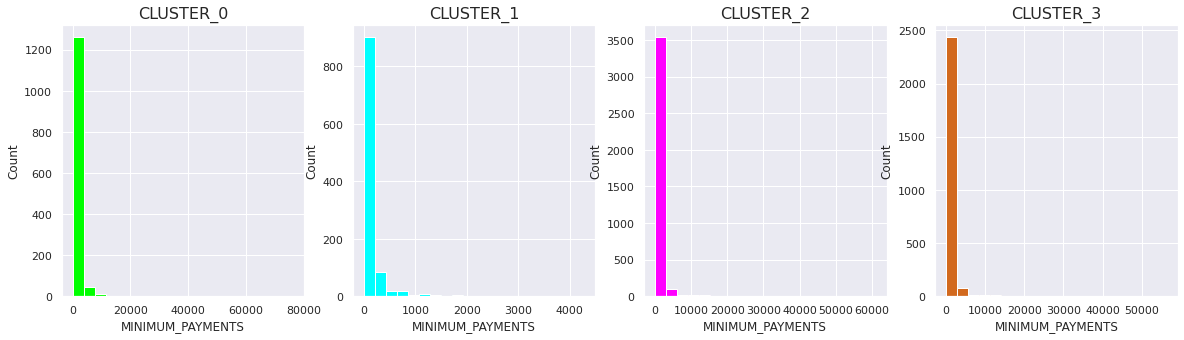

In [90]:
# Comparison the minimum-payments according to each cluster
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.hist(CLUSTER_0['MINIMUM_PAYMENTS'],bins=20, color = 'Lime')
plt.title('CLUSTER_0', size = 16)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['MINIMUM_PAYMENTS'], bins=20,color='Aqua' )
plt.title('CLUSTER_1', size = 16)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['MINIMUM_PAYMENTS'], bins=20,color='Fuchsia')
plt.title('CLUSTER_2', size = 16)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['MINIMUM_PAYMENTS'], bins=20,color='chocolate')
plt.title('CLUSTER_3', size = 16)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Count')
plt.grid()

plt.show()

<font color='blue'>**Let's compare the purchase frequency according to each cluster** <font> 

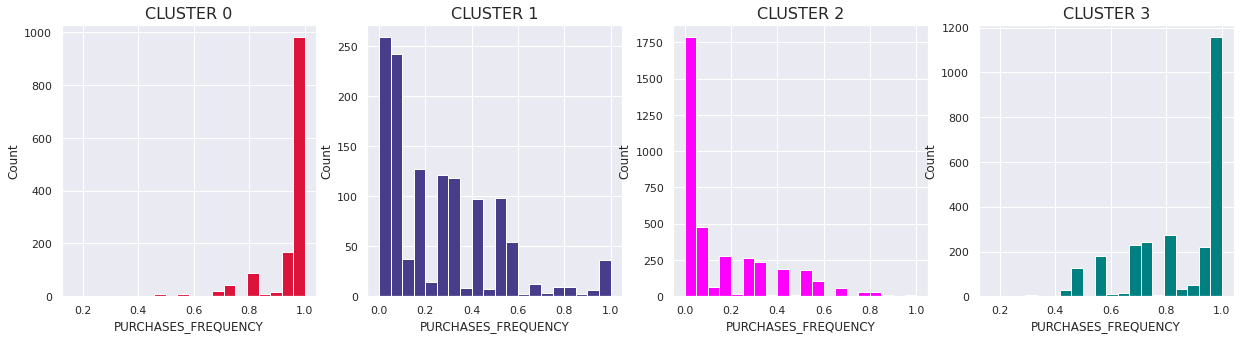

In [91]:
# Comparison purchase frequency according to each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
plt.hist(CLUSTER_0['PURCHASES_FREQUENCY'], bins=20,color = 'Crimson')
plt.title('CLUSTER 0', size = 16)
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['PURCHASES_FREQUENCY'],bins=20, color='DarkSlateBlue')
plt.title('CLUSTER 1', size = 16)
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['PURCHASES_FREQUENCY'], bins=20,color='Magenta')
plt.title('CLUSTER 2', size = 16)
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['PURCHASES_FREQUENCY'],bins=20, color='Teal')
plt.title('CLUSTER 3', size = 16)
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()
plt.show()

<font color='blue'>**Let's compare the oneoff-purchase-frequency according to each cluster** <font> 

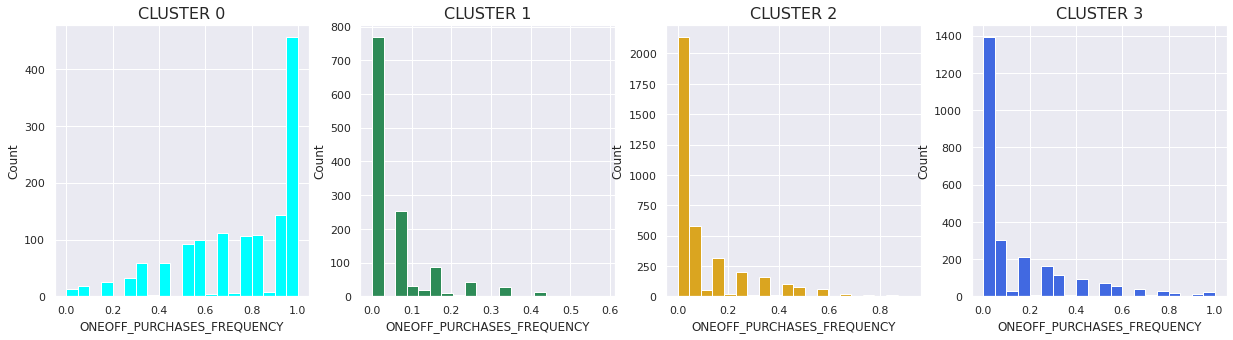

In [92]:
# Comparison the oneoff-purchase-frequency according to each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
plt.hist(CLUSTER_0['ONEOFF_PURCHASES_FREQUENCY'], bins=20,color = 'Aqua')
plt.title('CLUSTER 0', size = 16)
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['ONEOFF_PURCHASES_FREQUENCY'],bins=20, color='SeaGreen')
plt.title('CLUSTER 1', size = 16)
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['ONEOFF_PURCHASES_FREQUENCY'], bins=20,color='Goldenrod')
plt.title('CLUSTER 2', size = 16)
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['ONEOFF_PURCHASES_FREQUENCY'],bins=20, color='RoyalBlue')
plt.title('CLUSTER 3', size = 16)
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Count')
plt.grid()
plt.show()

<font color='blue'>**Let's compare the purchase-installments-frequency according to each cluster** <font> 

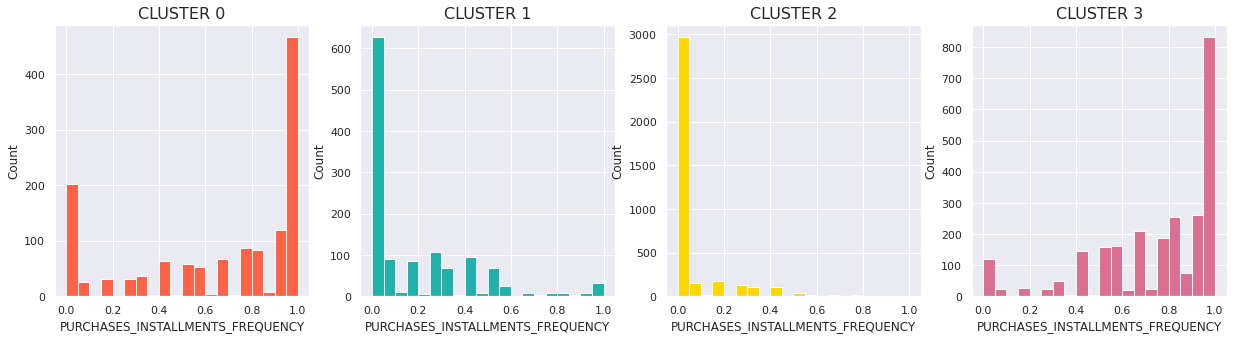

In [93]:
# Comparison the purchase-installments-frequency according to each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
plt.hist(CLUSTER_0['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=20,color = 'Tomato')
plt.title('CLUSTER 0', size = 16)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['PURCHASES_INSTALLMENTS_FREQUENCY'],bins=20, color='LightSeaGreen')
plt.title('CLUSTER 1', size = 16)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=20,color='Gold')
plt.title('CLUSTER 2', size = 16)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['PURCHASES_INSTALLMENTS_FREQUENCY'],bins=20, color='PaleVioletRed')
plt.title('CLUSTER 3', size = 16)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('Count')
plt.grid()
plt.show()

<font color='blue'>**Let's compare the cash-advance-frequency according to each cluster** <font> 

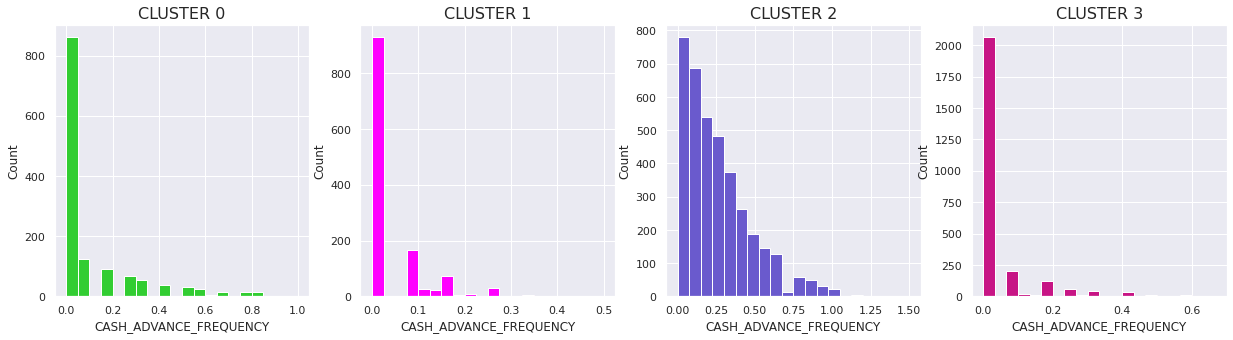

In [94]:
# Comparison the cash-advance-frequency according to each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
plt.hist(CLUSTER_0['CASH_ADVANCE_FREQUENCY'], bins=20,color = 'LimeGreen')
plt.title('CLUSTER 0', size = 16)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,2)
plt.hist(CLUSTER_1['CASH_ADVANCE_FREQUENCY'],bins=20, color='Magenta')
plt.title('CLUSTER 1', size = 16)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,3)
plt.hist(CLUSTER_2['CASH_ADVANCE_FREQUENCY'], bins=20,color='SlateBlue')
plt.title('CLUSTER 2', size = 16)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,4,4)
plt.hist(CLUSTER_3['CASH_ADVANCE_FREQUENCY'],bins=20, color='MediumVioletRed')
plt.title('CLUSTER 3', size = 16)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('Count')
plt.grid()
plt.show()

<font color='blue'>**Let's compare the oneoff-purchases and installments-purchases details according to each cluster** <font> 

Text(0.5, 1.0, 'PURCHASES RATIO')

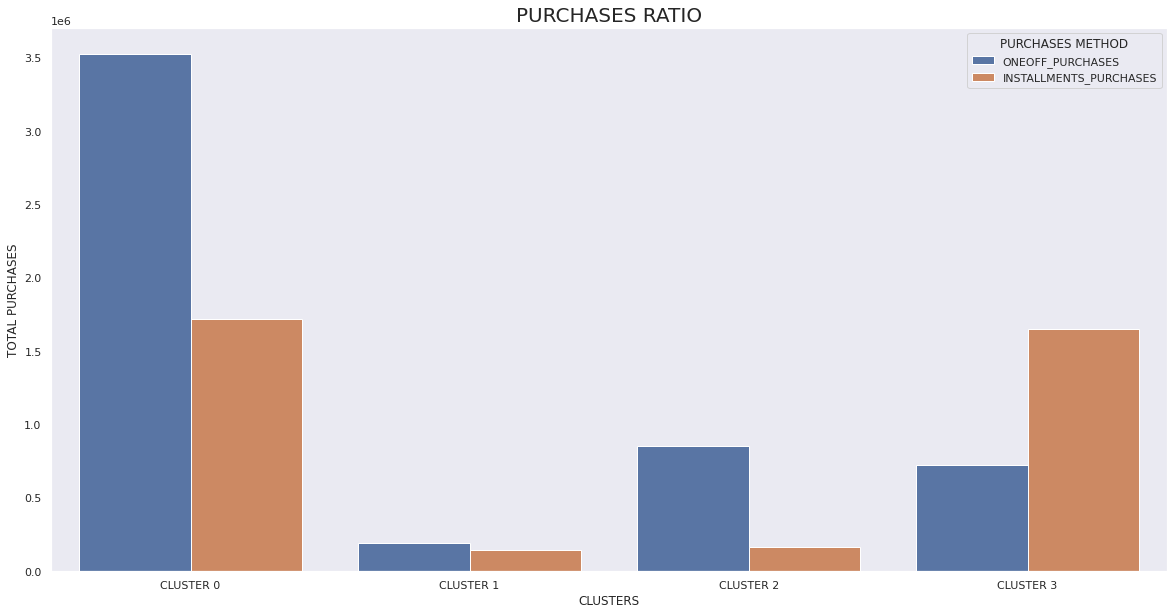

In [95]:
# comparison the oneoff-purchases and installments-purchases details according to each cluster.

PURCHASES_DF=pd.DataFrame({'CLUSTER' : ['CLUSTER 0', 'CLUSTER 0', 'CLUSTER 1', 'CLUSTER 1','CLUSTER 2', 'CLUSTER 2','CLUSTER 3', 'CLUSTER 3'],
                            'PURCHASES METHOD' : ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],
                            'TOTAL PURCHASES' : [ CLUSTER_0['ONEOFF_PURCHASES'].sum(), 
                                            CLUSTER_0['INSTALLMENTS_PURCHASES'].sum(),
                                            CLUSTER_1['ONEOFF_PURCHASES'].sum(), 
                                            CLUSTER_1['INSTALLMENTS_PURCHASES'].sum(),
                                            CLUSTER_2['ONEOFF_PURCHASES'].sum(), 
                                            CLUSTER_2['INSTALLMENTS_PURCHASES'].sum(),
                                            CLUSTER_3['ONEOFF_PURCHASES'].sum(),
                                            CLUSTER_3['INSTALLMENTS_PURCHASES'].sum()], 
                                        })
PURCHASES_DF

# Drawing barplot
plt.figure(figsize=(20,10))
sns.barplot(x='CLUSTER', y='TOTAL PURCHASES', data=PURCHASES_DF, hue = 'PURCHASES METHOD' )
plt.ylabel('TOTAL PURCHASES')
plt.xlabel('CLUSTERS')
plt.title('PURCHASES RATIO', size = 20)

<font color='blue'>**Let's compare balance and purchases according to each cluster** <font> 

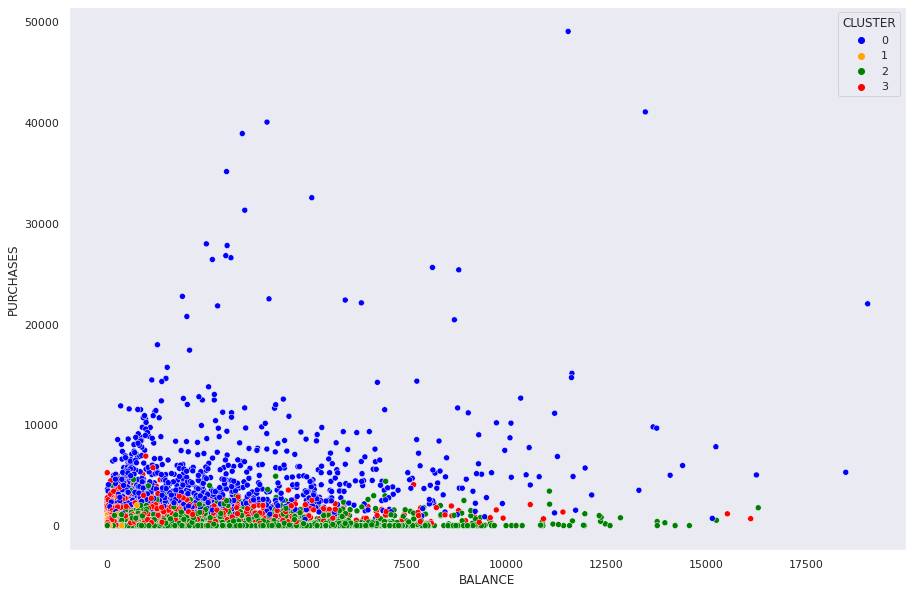

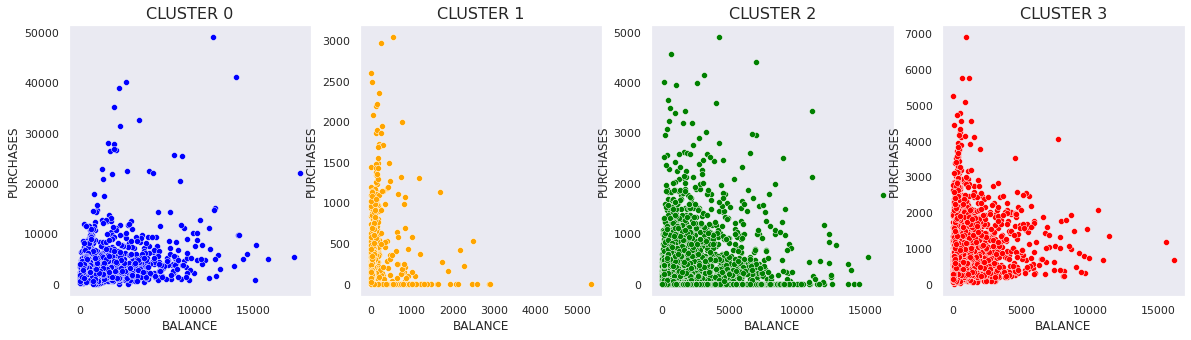

In [96]:
# Comparison between balance and purchases according to each cluster.
sns.set(style='dark')
plt.figure(figsize=(15,10))
sns.scatterplot( x = 'BALANCE', y = 'PURCHASES',data = Clustered_df, hue = 'CLUSTER', palette=['Blue', 'orange', 'green', 'red'])
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.scatterplot(CLUSTER_0['BALANCE'], CLUSTER_0['PURCHASES'], color='Blue')
plt.title('CLUSTER 0', size = 16)
plt.subplot(1,4,2)
sns.scatterplot(CLUSTER_1['BALANCE'], CLUSTER_1['PURCHASES'], color='orange')
plt.title('CLUSTER 1', size = 16)
plt.subplot(1,4,3)
sns.scatterplot(CLUSTER_2['BALANCE'], CLUSTER_2['PURCHASES'], color='green')
plt.title('CLUSTER 2', size = 16)
plt.subplot(1,4,4)
sns.scatterplot(CLUSTER_3['BALANCE'], CLUSTER_3['PURCHASES'], color='red')
plt.title('CLUSTER 3', size = 16)
plt.show()

<font color='blue'>**Let's draw a 3D plot** <font> 

In [98]:
import plotly.graph_objects as go
# # 3D plot for one off-purchase-frequency, purchase-installment-frequency and cash-advance-frequency
fig = go.Figure()

def cluster3D(cluster, color):
    fig.add_trace(go.Scatter3d(
                        x=Clustered_df[Clustered_df.CLUSTER == cluster]['ONEOFF_PURCHASES_FREQUENCY'],
                        y=Clustered_df[Clustered_df.CLUSTER == cluster]['PURCHASES_INSTALLMENTS_FREQUENCY'],
                        z=Clustered_df[Clustered_df.CLUSTER == cluster]['CASH_ADVANCE_FREQUENCY'],
                        mode='markers',name=f'CLUSTER {cluster}',marker_color=color,marker_size=4))


for C in list(Clustered_df.CLUSTER.unique()):
    if C == 0:
        cluster3D(0, 'blue')
    elif C == 1:
        cluster3D(1, 'orange')
    elif C == 2:
        cluster3D(2, 'green')
    elif C == 3:
       cluster3D(3, 'red')


fig.update_layout(height=800, width=1000,scene=dict(
                                    xaxis_title='ONEOFF_PURCHASES_FREQUENCY',
                                    yaxis_title='PURCHASES_INSTALLMENTS_FREQUENCY',
                                    zaxis_title='CASH_ADVANCE_FREQUENCY'),
                                    title_text='3D Projection of data according to four clusters.')

# Step-8: Conclusion
****

<font color='blue'> **CLUSTER_0** <font>

**characteristics:**

- Have balance up to 5500
- Made purchase up to 7200
- Made oneoff purchase up to 4900
- Made installment purchase up to 2374
- Made Cash advance up to 800
- Have Credit Limit up to 16000

The cluster's users who like the one-time payment method (one off purchases). We believe that customers in this cluster make regular monthly payments using a credit card for things like their electricity bill, monthly expenses, or other necessities. Users on this cluster so frequently use credit cards only to postpone payments rather than to make installment payments. As a result, we may refer to them as equilibrium spenders.

<font color='blue'> **CLUSTER_1** <font>

**characteristics:**

- Have balance up to 6000
- Made cash advance up to 5900
- Made payments up to 3600
- Have credit limit up to 12750

Most users of the cluster have large balances, yet they hardly ever use their credit cards to make purchases. We could assume that consumers of this type primarily spend their money for saving or investing purposes. So, we can refer to them as depositors.

<font color='blue'> **CLUSTER_2** <font>

**characteristics:**

- Have balance up to 4600
- Made purchase up to 2000
- Made cash advance up to 2500
- Made Payments up to 3400
- Have credit limit up to 12300

Users of the cluster who prefer one-time purchases than installment payments. They frequently desire to pay without installing as a result. We think that people on this cluster are almost certainly buying something to avoid paying credit card interest.
So, we can mention them as potential customers.

<font color='blue'> **CLUSTER_3** <font>

**characteristics:**

- Have balance up to 3000
- Made purchase up to 2000
- Made one off purchase up to 120
- Made installment purchase up to 1800
- Made payment up to 3000
- Have credit limit up to 10000

Users in this cluster are those with low balances and low credit limits. Users on this cluster frequently make installment payments and enjoy shopping. They hardly ever utilize full payments. Given that they only have a credit card and are recent graduates, we assume that the users on this cluster have relatively low credit limits. So, we can refer to them as credit card enthusiasts.

<font color='blue'> **Let's define the cluster title** <font>

In [34]:
Cluster_Title = []

for i in Clustered_df['CLUSTER'] :
    if i == 0 :
        Cluster_Title.append('equilibrium spenders')
    elif i == 1 :
        Cluster_Title.append('depositors')
    elif i == 2 :
        Cluster_Title.append('potential customers')
    elif i == 3 :
        Cluster_Title.append('credit card enthusiasts')
        
Clustered_df['CLUSTER TITLE'] = Cluster_Title
Clustered_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  \
0   201.802084        139.509787          0.000000      12        2   
1  4103.032597       1072.340217          0.222222      12        2   
2   622.066742        627.284787          0.000000      12        0   
3     0.000000               NaN          0.000000      12        2   
4   678.334763        244.791237          0.000000      12        2   

          CLUSTER TITLE  
0   potential customers  
1   potential customers  
2  equilibrium spenders  
3   potential customers  
4   potential customers

<font color='blue'> **Let's compress the outcomes** <font>

In [103]:
# Compressed the outcomes into a CSV file
Clustered_df.to_csv('Customer segmentation with clusters.csv', index=False)